## Introduction

Цель данного исследования — проанализировать факторы,
влияющие на качество обслуживания в отелях Казахстана,
используя структурированные данные и пользовательские отзывы.


## Research Questions

1. Какие характеристики отеля оказывают наибольшее влияние на качество сервиса?
2. Влияет ли количество удобств на пользовательский рейтинг?
3. Можно ли предсказать качество обслуживания на основе агрегированных признаков?


## Problem Statement and Relevance

Несмотря на рост туристического потока в Казахстане, уровень удовлетворённости
гостей отелей остаётся неоднородным. Для повышения качества сервиса и лояльности
клиентов важно понимать, какие факторы оказывают наибольшее влияние на восприятие
качества обслуживания.

Целью данного исследования является анализ влияния характеристик отелей,
пользовательских отзывов и показателей сервиса на общий рейтинг отелей Казахстана
с использованием методов Data Mining и машинного обучения.


In [1425]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (roc_auc_score, average_precision_score, f1_score, 
                           precision_score, recall_score, confusion_matrix, 
                           classification_report, roc_curve, precision_recall_curve)
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression

import warnings
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, f1_score

import re
from collections import Counter
warnings.filterwarnings('ignore')
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import f_classif
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from collections import Counter


In [1426]:
df_hotels = pd.read_csv("hotels_dataset.csv")
df_hotels

,hotel_id,hotel_name,city,district_category,distance_to_center,distance_to_airport_km,price_per_night,room_type_used_for_price,refundable,overall_rating,...,has_room_service,has_airport_shuttle,has_24h_front_desk,has_non_smoking_rooms,has_family_rooms,has_pet_friendly,has_elevator,number_of_reviews,check_in_time,check_out_time
0,1,"The Ritz-Carlton, Almaty",Almaty,Bostandyk,3.0,18.0,450000,Deluxe King,True,9,...,True,True,True,True,True,True,True,1200,15:00,12:00
1,2,InterContinental Almaty,Almaty,Bostandyk,2.0,17.0,220000,Superior King,True,"8,7",...,True,True,True,True,True,False,True,950,14:00,12:00
2,3,Rahat Palace Hotel,Almaty,Bostandyk,3.5,19.0,130000,Standard Double,True,"8,6",...,True,False,True,True,True,False,True,900,14:00,12:00
3,4,Swissôtel Wellness Resort Alatau Almaty,Almaty,Bostandyk,12.0,25.0,180000,Superior King,True,"9,1",...,True,True,True,True,True,True,True,400,15:00,12:00
4,5,DoubleTree by Hilton Almaty,Almaty,Almaly,1.5,16.0,120000,King Guest Room,True,"7,9",...,True,False,True,True,True,True,True,800,14:00,12:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,314,Lafayette Hotel,Shymkent,central,"1,5",14,25000,standard_double,True,"6,6",...,True,True,True,True,True,False,True,210,14:00,12:00
313,315,Askar Hotel,Shymkent,near_center,"3,9",10,15500,standard_double,False,"7,2",...,False,False,False,True,False,False,False,40,13:00,12:00
314,316,OrdaBasy Hotel,Shymkent,central,"0,9",13,20000,standard_double,True,"3,6",...,True,False,True,True,True,False,True,115,14:00,12:00
315,317,Bellagio Boutique Inn,Shymkent,residential,"4,9","9,5",18500,standard_double,False,"8,9",...,False,False,False,True,False,False,False,55,13:00,12:00


In [1427]:
df_hotels = pd.read_csv("hotels_dataset.csv")
df_hotels

,hotel_id,hotel_name,city,district_category,distance_to_center,distance_to_airport_km,price_per_night,room_type_used_for_price,refundable,overall_rating,...,has_room_service,has_airport_shuttle,has_24h_front_desk,has_non_smoking_rooms,has_family_rooms,has_pet_friendly,has_elevator,number_of_reviews,check_in_time,check_out_time
0,1,"The Ritz-Carlton, Almaty",Almaty,Bostandyk,3.0,18.0,450000,Deluxe King,True,9,...,True,True,True,True,True,True,True,1200,15:00,12:00
1,2,InterContinental Almaty,Almaty,Bostandyk,2.0,17.0,220000,Superior King,True,"8,7",...,True,True,True,True,True,False,True,950,14:00,12:00
2,3,Rahat Palace Hotel,Almaty,Bostandyk,3.5,19.0,130000,Standard Double,True,"8,6",...,True,False,True,True,True,False,True,900,14:00,12:00
3,4,Swissôtel Wellness Resort Alatau Almaty,Almaty,Bostandyk,12.0,25.0,180000,Superior King,True,"9,1",...,True,True,True,True,True,True,True,400,15:00,12:00
4,5,DoubleTree by Hilton Almaty,Almaty,Almaly,1.5,16.0,120000,King Guest Room,True,"7,9",...,True,False,True,True,True,True,True,800,14:00,12:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,314,Lafayette Hotel,Shymkent,central,"1,5",14,25000,standard_double,True,"6,6",...,True,True,True,True,True,False,True,210,14:00,12:00
313,315,Askar Hotel,Shymkent,near_center,"3,9",10,15500,standard_double,False,"7,2",...,False,False,False,True,False,False,False,40,13:00,12:00
314,316,OrdaBasy Hotel,Shymkent,central,"0,9",13,20000,standard_double,True,"3,6",...,True,False,True,True,True,False,True,115,14:00,12:00
315,317,Bellagio Boutique Inn,Shymkent,residential,"4,9","9,5",18500,standard_double,False,"8,9",...,False,False,False,True,False,False,False,55,13:00,12:00


**Data Sources**

В исследовании используются два основных источника данных: информация об отелях
(цены, расположение, удобства и рейтинги) и пользовательские отзывы клиентов.

Совмещение структурированных данных и отзывов позволяет провести более
глубокий анализ факторов, влияющих на качество обслуживания.



In [1428]:
df_hotels.shape

(317, 38)

In [1429]:
df_hotels.head()

,hotel_id,hotel_name,city,district_category,distance_to_center,distance_to_airport_km,price_per_night,room_type_used_for_price,refundable,overall_rating,...,has_room_service,has_airport_shuttle,has_24h_front_desk,has_non_smoking_rooms,has_family_rooms,has_pet_friendly,has_elevator,number_of_reviews,check_in_time,check_out_time
0,1,"The Ritz-Carlton, Almaty",Almaty,Bostandyk,3.0,18.0,450000,Deluxe King,True,9,...,True,True,True,True,True,True,True,1200,15:00,12:00
1,2,InterContinental Almaty,Almaty,Bostandyk,2.0,17.0,220000,Superior King,True,"8,7",...,True,True,True,True,True,False,True,950,14:00,12:00
2,3,Rahat Palace Hotel,Almaty,Bostandyk,3.5,19.0,130000,Standard Double,True,"8,6",...,True,False,True,True,True,False,True,900,14:00,12:00
3,4,Swissôtel Wellness Resort Alatau Almaty,Almaty,Bostandyk,12.0,25.0,180000,Superior King,True,"9,1",...,True,True,True,True,True,True,True,400,15:00,12:00
4,5,DoubleTree by Hilton Almaty,Almaty,Almaly,1.5,16.0,120000,King Guest Room,True,"7,9",...,True,False,True,True,True,True,True,800,14:00,12:00


**2. Анализ данных**

Набор данных содержит информацию об отелях в Казахстане.
Каждая строка представляет собой отдельный отель, а каждый столбец описывает характеристики отеля, цены, местоположение или удобства.
Набор данных состоит из **317 строк** и **38 столбцов**


In [1430]:
df_hotels.dtypes

hotel_id                     int64
hotel_name                  object
city                        object
district_category           object
distance_to_center          object
distance_to_airport_km      object
price_per_night              int64
room_type_used_for_price    object
refundable                    bool
overall_rating              object
rating_staff                object
rating_cleanliness          object
rating_comfort              object
rating_facilities           object
rating_location             object
rating_value                object
rating_wifi                 object
number_of_rooms              int64
stars                        int64
has_free_wifi                 bool
has_breakfast                 bool
has_parking                   bool
has_air_conditioning          bool
has_pool                      bool
has_spa                       bool
has_fitness_center            bool
has_restaurant                bool
has_bar                       bool
has_room_service    

In [1431]:
cols_to_convert = [
    "distance_to_center",
    "distance_to_airport_km",
    "overall_rating",
    "rating_staff",
    "rating_cleanliness",
    "rating_comfort",
    "rating_facilities",
    "rating_location",
    "rating_value",
    "rating_wifi"
]

for col in cols_to_convert:
    df_hotels[col] = df_hotels[col].str.replace(",", ".", regex=False).astype(float)

In [1432]:
df_hotels[cols_to_convert].dtypes

distance_to_center        float64
distance_to_airport_km    float64
overall_rating            float64
rating_staff              float64
rating_cleanliness        float64
rating_comfort            float64
rating_facilities         float64
rating_location           float64
rating_value              float64
rating_wifi               float64
dtype: object

**Приведение типов данных**

На данном этапе строковые значения, содержащие числовые данные (расстояния и рейтинги),
были приведены к числовому формату. Это необходимо для корректного проведения
корреляционного анализа, статистических тестов и построения моделей.



In [1433]:
df_hotels.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   hotel_id                  317 non-null    int64  
 1   hotel_name                317 non-null    object 
 2   city                      317 non-null    object 
 3   district_category         317 non-null    object 
 4   distance_to_center        317 non-null    float64
 5   distance_to_airport_km    317 non-null    float64
 6   price_per_night           317 non-null    int64  
 7   room_type_used_for_price  317 non-null    object 
 8   refundable                317 non-null    bool   
 9   overall_rating            316 non-null    float64
 10  rating_staff              316 non-null    float64
 11  rating_cleanliness        316 non-null    float64
 12  rating_comfort            316 non-null    float64
 13  rating_facilities         316 non-null    float64
 14  rating_loc

**Анализ пропущенных значений**

Доля пропущенных значений в датасете минимальна (менее 1%) и сосредоточена в отдельных
оценках аспектов сервиса. Такое количество пропусков не оказывает существенного
влияния на результаты анализа и было обработано стандартными методами.



In [1434]:
df_hotels.isnull().mean().sort_values(ascending=False) * 100


rating_wifi                 0.630915
rating_cleanliness          0.315457
rating_facilities           0.315457
rating_value                0.315457
overall_rating              0.315457
rating_staff                0.315457
rating_location             0.315457
rating_comfort              0.315457
has_fitness_center          0.000000
has_restaurant              0.000000
has_bar                     0.000000
has_room_service            0.000000
has_airport_shuttle         0.000000
hotel_id                    0.000000
has_pool                    0.000000
has_24h_front_desk          0.000000
has_non_smoking_rooms       0.000000
has_family_rooms            0.000000
has_pet_friendly            0.000000
has_elevator                0.000000
number_of_reviews           0.000000
check_in_time               0.000000
has_spa                     0.000000
has_free_wifi               0.000000
has_air_conditioning        0.000000
has_parking                 0.000000
has_breakfast               0.000000
h

In [1435]:
df_hotels.duplicated().sum()


np.int64(0)

In [1436]:
df_hotels["hotel_id"].duplicated().sum()


np.int64(0)

**Выводы по качеству данных**

Анализ структуры данных показал, что:
- большинство признаков заполнены полностью;
- небольшое количество пропусков присутствует в числовых рейтингах;
- доля пропусков не превышает 1%, что не оказывает существенного влияния на анализ.

Пропущенные значения были обработаны на следующих этапах либо удалены, либо заменены агрегированными значениями.



## 2. Exploratory Data Analysis (EDA)

Цель этапа EDA — выявить основные закономерности и распределения в данных, а также определить потенциальные факторы, влияющие на общее качество обслуживания отелей.

В рамках EDA анализируются:
- распределения рейтингов,
- различия между городами,
- ценовые характеристики,
- популярность отелей,
- наличие инфраструктурных удобств.



**1. Распределение пользовательских рейтингов**
На данном этапе анализируется распределение общего рейтинга отелей, 
чтобы оценить общее восприятие качества сервиса пользователями.



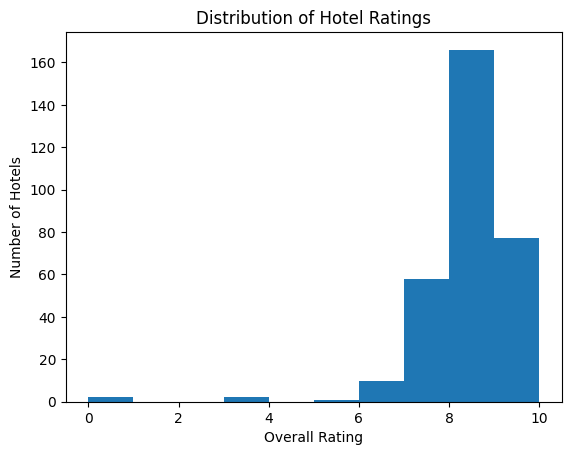

In [1437]:
plt.figure()
plt.hist(df_hotels["overall_rating"], bins=10)
plt.xlabel("Overall Rating")
plt.ylabel("Number of Hotels")
plt.title("Distribution of Hotel Ratings")
plt.show()

### Вывод
Большинство отелей имеют высокие пользовательские рейтинги (в диапазоне 8–10), 
что свидетельствует о в целом положительном восприятии качества обслуживания.



**2. Анализ ценовой политики отелей**
В данном разделе анализируется средняя стоимость проживания в зависимости от города, 
что позволяет выявить территориальные различия в ценах.


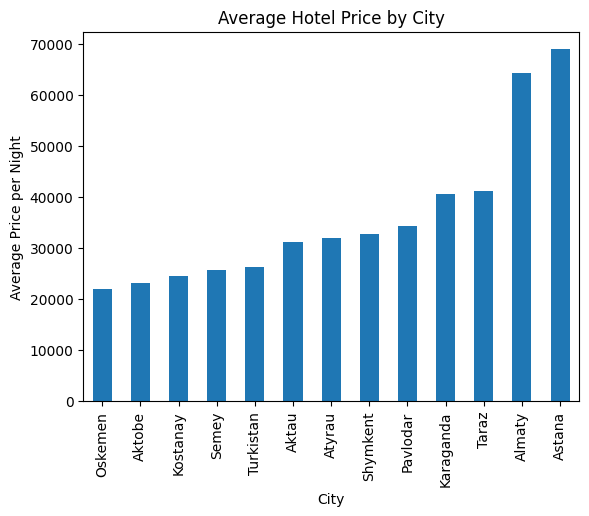

In [1438]:
avg_price_city = df_hotels.groupby("city")["price_per_night"].mean().sort_values()

plt.figure()
avg_price_city.plot(kind="bar")
plt.xlabel("City")
plt.ylabel("Average Price per Night")
plt.title("Average Hotel Price by City")
plt.show()


**Вывод**
Цены на отели существенно варируются между городами.  
Крупные города характеризуются более высокой средней стоимостью проживания, 
что отражает повышенный спрос и более высокие ожидания клиентов.


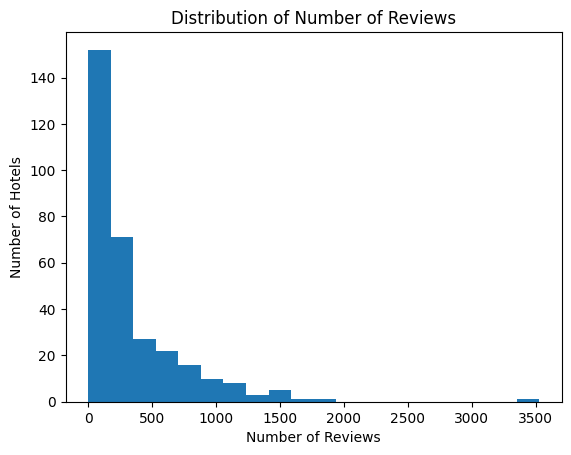

In [1439]:
plt.figure()
plt.hist(df_hotels["number_of_reviews"], bins=20)
plt.xlabel("Number of Reviews")
plt.ylabel("Number of Hotels")
plt.title("Distribution of Number of Reviews")
plt.show()

**Количество отзывов**

Большинство отелей имеют относительно небольшое количество отзывов, в то время как
некоторые отели значительно выделяются по этому показателю.

Это позволяет предположить, что количество отзывов отражает популярность или узнаваемость
отеля, а не напрямую уровень качества обслуживания.


**Количество отзывов и вовлечённость пользователей**

Количество отзывов используется как индикатор популярности отеля 
и надёжности пользовательских оценок.

**Вывод**

Большинство отелей имеют умеренное количество отзывов, 
в то время как небольшая часть объектов получает значительно больше внимания пользователей.


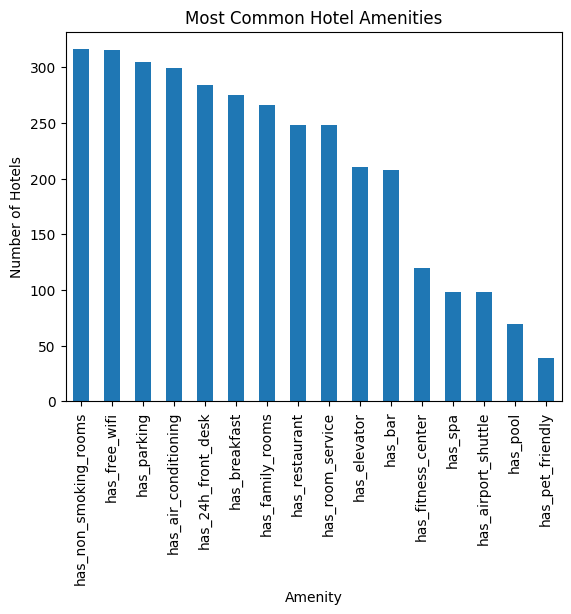

In [1440]:
amenities_cols = [col for col in df_hotels.columns if col.startswith("has_")]

amenities_count = df_hotels[amenities_cols].sum().sort_values(ascending=False)

plt.figure()
amenities_count.plot(kind="bar")
plt.xlabel("Amenity")
plt.ylabel("Number of Hotels")
plt.title("Most Common Hotel Amenities")
plt.show()


**Анализ распространённости удобств в отелях**

На данном этапе был проведён анализ наиболее распространённых удобств,
предоставляемых отелями. Для этого были использованы бинарные признаки,
отражающие наличие конкретных сервисов (has_*).

Результаты показывают, что базовые удобства, такие как Wi-Fi, парковка,
кондиционирование и круглосуточная стойка регистрации, присутствуют
у большинства отелей. Это указывает на то, что данные сервисы стали
стандартом гостиничного обслуживания и не являются дифференцирующим фактором.

В то же время дополнительные удобства, такие как спа-зона, бассейн,
трансфер и экологическая направленность, встречаются значительно реже.
Это позволяет предположить, что расширенный набор сервисов характерен
для ограниченного числа отелей и может влиять на позиционирование
и восприятие качества обслуживания.

Полученные результаты послужили основой для формирования агрегированного
признака количества удобств (`amenities_count`), который далее используется
для анализа влияния инфраструктуры на общий рейтинг отеля.



**Text data preparation(reviews) - Amina**

In [1441]:
df_reviews = pd.read_csv("reviews_dataset.csv")
df_reviews

,hotel_id,review_text_positive,review_text_negative,review_score,traveler_type
0,1,"""Location, facilities, room and staff were all...","""Property needs more bi-lingual staff to cater...",10,Couple
1,1,"""The staff were very nice. The cleaning lady G...","""it is overpriced for Kazakhstan.""",9,Business-taveler
2,1,"""Proximity to our daughter who is studying at ...","""Not a dislike - rather constructive criticism...",9,Family
3,1,"""Our favorite part about the hotel was the vie...","""The hotel looks a bit old and tired. Could us...",7,Couple
4,1,"""Comfortable room and view not enough amenities""","""Garbage you locked the mini bar on valentine ...",3,Couple
...,...,...,...,...,...
1822,253,"""Friendly and multilingual staff available at ...","""Limited privacy due to hostel-style accommoda...",7,Business-taveler
1823,253,"""Shared kitchen is well equipped, convenient f...","""Noise can be heard from common areas late in ...",8,Business-taveler
1824,253,"""Clean rooms and common areas, housekeeping is...","""Convenience store selection is quite basic.""",8,Business-taveler
1825,253,"""Stable and fast Wi-Fi, worked well in rooms a...","""Microwaves are shared, sometimes have to wait...",7,Family


**Text Data Preparation: Reviews Dataset**

На данном этапе проводится первичный анализ текстовых данных отзывов клиентов.
Данный датасет содержит как положительные, так и отрицательные комментарии,
оставленные гостями отелей, а также числовую оценку и тип путешественника.

Анализ текстовых данных необходим для последующего извлечения информации
о клиентском опыте и оценки его влияния на общее восприятие качества сервиса.


In [1442]:
df_reviews.shape

(1827, 5)

**Структура и характеристики текстовых данных**

Датасет отзывов содержит 1827 записей и 5 признаков, включая идентификатор отеля,
текст положительного и отрицательного отзыва, числовую оценку и тип путешественника.

Все текстовые поля представлены строковым форматом, что соответствует
ожидаемой структуре данных для последующей текстовой обработки и анализа.


In [1443]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   hotel_id              1827 non-null   int64 
 1   review_text_positive  1825 non-null   object
 2   review_text_negative  1827 non-null   object
 3   review_score          1827 non-null   object
 4   traveler_type         1827 non-null   object
dtypes: int64(1), object(4)
memory usage: 71.5+ KB


In [1444]:
df_reviews.describe(include="object")

,review_text_positive,review_text_negative,review_score,traveler_type
count,1825,1827,1827,1827
unique,1756,1802,12,10
top,"""Location""","""poor sound insulation""",8,Single
freq,15,4,487,662


**Первичный анализ текстовых и категориальных признаков**

Анализ категориальных и текстовых полей показывает высокое разнообразие
уникальных отзывов, что свидетельствует о богатстве текстовой информации.

Наиболее часто встречающиеся темы в положительных отзывах связаны с
расположением и удобствами, тогда как отрицательные отзывы чаще упоминают
проблемы шума и инфраструктуры. Это указывает на ключевые аспекты
клиентского опыта, формирующие общее восприятие сервиса.


In [1445]:
df_reviews.isnull().sum()

hotel_id                0
review_text_positive    2
review_text_negative    0
review_score            0
traveler_type           0
dtype: int64

**Качество текстовых данных**

Проверка пропущенных значений показала, что доля отсутствующих данных
в текстовых полях минимальна и не оказывает существенного влияния
на результаты анализа.

Таким образом, датасет может быть использован для дальнейшей обработки
текста без необходимости сложных процедур восстановления данных.


**Роль текстовых данных в исследовании**

Текстовые отзывы клиентов являются важным источником информации
о реальном качестве обслуживания, так как позволяют выявить
аспекты сервиса, которые невозможно полностью отразить числовыми показателями.

В дальнейшем данные отзывы будут очищены и агрегированы на уровне отелей
для расчёта показателей, характеризующих общее эмоциональное восприятие сервиса,
и использованы в моделях машинного обучения.


In [1446]:
df_reviews = df_reviews.dropna(subset=["review_text_positive", "review_text_negative"])

In [1447]:
df_reviews.isnull().sum()

hotel_id                0
review_text_positive    0
review_text_negative    0
review_score            0
traveler_type           0
dtype: int64

In [1448]:
df_reviews.duplicated().sum()

np.int64(2)

In [1449]:
df_reviews = df_reviews.drop_duplicates()

Объединение положительных и отрицательных отзывов

In [1450]:
df_reviews["full_review"] = (
    df_reviews["review_text_positive"].fillna("") + " " +
    df_reviews["review_text_negative"].fillna("")
)

In [1451]:
df_reviews[["review_text_positive", "review_text_negative", "full_review"]].head()

,review_text_positive,review_text_negative,full_review
0,"""Location, facilities, room and staff were all...","""Property needs more bi-lingual staff to cater...","""Location, facilities, room and staff were all..."
1,"""The staff were very nice. The cleaning lady G...","""it is overpriced for Kazakhstan.""","""The staff were very nice. The cleaning lady G..."
2,"""Proximity to our daughter who is studying at ...","""Not a dislike - rather constructive criticism...","""Proximity to our daughter who is studying at ..."
3,"""Our favorite part about the hotel was the vie...","""The hotel looks a bit old and tired. Could us...","""Our favorite part about the hotel was the vie..."
4,"""Comfortable room and view not enough amenities""","""Garbage you locked the mini bar on valentine ...","""Comfortable room and view not enough amenitie..."


Базовые характеристики текста

In [1452]:
df_reviews["review_length_chars"] = df_reviews["full_review"].str.len()
df_reviews["review_length_chars"].describe()

count    1823.000000
mean      185.688974
std       124.421345
min        25.000000
25%       114.000000
50%       149.000000
75%       222.000000
max      1723.000000
Name: review_length_chars, dtype: float64

In [1453]:
df_reviews["review_length_words"] = df_reviews["full_review"].str.split().apply(len)
df_reviews["review_length_words"].describe()

count    1823.000000
mean       31.366978
std        22.703592
min         4.000000
25%        18.000000
50%        24.000000
75%        38.000000
max       301.000000
Name: review_length_words, dtype: float64

In [1454]:
df_reviews

,hotel_id,review_text_positive,review_text_negative,review_score,traveler_type,full_review,review_length_chars,review_length_words
0,1,"""Location, facilities, room and staff were all...","""Property needs more bi-lingual staff to cater...",10,Couple,"""Location, facilities, room and staff were all...",134,18
1,1,"""The staff were very nice. The cleaning lady G...","""it is overpriced for Kazakhstan.""",9,Business-taveler,"""The staff were very nice. The cleaning lady G...",200,35
2,1,"""Proximity to our daughter who is studying at ...","""Not a dislike - rather constructive criticism...",9,Family,"""Proximity to our daughter who is studying at ...",379,58
3,1,"""Our favorite part about the hotel was the vie...","""The hotel looks a bit old and tired. Could us...",7,Couple,"""Our favorite part about the hotel was the vie...",520,90
4,1,"""Comfortable room and view not enough amenities""","""Garbage you locked the mini bar on valentine ...",3,Couple,"""Comfortable room and view not enough amenitie...",226,41
...,...,...,...,...,...,...,...,...
1822,253,"""Friendly and multilingual staff available at ...","""Limited privacy due to hostel-style accommoda...",7,Business-taveler,"""Friendly and multilingual staff available at ...",120,16
1823,253,"""Shared kitchen is well equipped, convenient f...","""Noise can be heard from common areas late in ...",8,Business-taveler,"""Shared kitchen is well equipped, convenient f...",133,22
1824,253,"""Clean rooms and common areas, housekeeping is...","""Convenience store selection is quite basic.""",8,Business-taveler,"""Clean rooms and common areas, housekeeping is...",105,15
1825,253,"""Stable and fast Wi-Fi, worked well in rooms a...","""Microwaves are shared, sometimes have to wait...",7,Family,"""Stable and fast Wi-Fi, worked well in rooms a...",125,21


Очистка текста (Text Cleaning)

In [1455]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zа-яё\s]", "", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

In [1456]:
df_reviews["clean_review"] = df_reviews["full_review"].apply(clean_text)
df_reviews[["full_review", "clean_review"]].head()

,full_review,clean_review
0,"""Location, facilities, room and staff were all...",location facilities room and staff were all ex...
1,"""The staff were very nice. The cleaning lady G...",the staff were very nice the cleaning lady gul...
2,"""Proximity to our daughter who is studying at ...",proximity to our daughter who is studying at k...
3,"""Our favorite part about the hotel was the vie...",our favorite part about the hotel was the view...
4,"""Comfortable room and view not enough amenitie...",comfortable room and view not enough amenities...


**Проверка языка отзывов**

In [1457]:
def detect_language_simple(text):
    if re.search(r"[а-яА-ЯёЁ]", text):
        return "ru"
    elif re.search(r"[a-zA-Z]", text):
        return "en"
    else:
        return "other"

In [1458]:
df_reviews["language"] = df_reviews["clean_review"].apply(detect_language_simple)
df_reviews["language"].value_counts()

language
en    1815
ru       8
Name: count, dtype: int64

**Фильтрация по языку**

In [1459]:
df_reviews = df_reviews[df_reviews["language"].isin(["ru", "en"])]

In [1460]:
df_reviews.head(5)

,hotel_id,review_text_positive,review_text_negative,review_score,traveler_type,full_review,review_length_chars,review_length_words,clean_review,language
0,1,"""Location, facilities, room and staff were all...","""Property needs more bi-lingual staff to cater...",10,Couple,"""Location, facilities, room and staff were all...",134,18,location facilities room and staff were all ex...,en
1,1,"""The staff were very nice. The cleaning lady G...","""it is overpriced for Kazakhstan.""",9,Business-taveler,"""The staff were very nice. The cleaning lady G...",200,35,the staff were very nice the cleaning lady gul...,en
2,1,"""Proximity to our daughter who is studying at ...","""Not a dislike - rather constructive criticism...",9,Family,"""Proximity to our daughter who is studying at ...",379,58,proximity to our daughter who is studying at k...,en
3,1,"""Our favorite part about the hotel was the vie...","""The hotel looks a bit old and tired. Could us...",7,Couple,"""Our favorite part about the hotel was the vie...",520,90,our favorite part about the hotel was the view...,en
4,1,"""Comfortable room and view not enough amenities""","""Garbage you locked the mini bar on valentine ...",3,Couple,"""Comfortable room and view not enough amenitie...",226,41,comfortable room and view not enough amenities...,en


**Агрегация отзывов на уровне отелей**

Так как целью исследования является анализ качества обслуживания на уровне
отелей, текстовые отзывы были агрегированы по идентификатору отеля.

В результате для каждого отеля были получены обобщённые показатели,
характеризующие среднее восприятие сервиса клиентами. Это позволяет
корректно объединить текстовые данные с основным датасетом отелей
и использовать их в дальнейшем анализе.


In [1461]:
df_reviews["review_score"].dtype

dtype('O')

In [1462]:
df_reviews["review_score"] = pd.to_numeric(
    df_reviews["review_score"],
    errors="coerce"
)

In [1463]:
df_reviews["review_score"].isna().sum()

np.int64(2)

In [1464]:
df_reviews = df_reviews.dropna(subset=["review_score"])

In [1465]:
reviews_agg = (
    df_reviews
    .groupby("hotel_id")
    .agg(
        aggregated_reviews=("clean_review", " ".join),
        avg_review_score=("review_score", "mean"),
        num_reviews=("clean_review", "count")
    )
    .reset_index()
)

In [1466]:
reviews_agg.head()

,hotel_id,aggregated_reviews,avg_review_score,num_reviews
0,1,location facilities room and staff were all ex...,6.500000,6
1,2,the location and nature are perfect pool floor...,7.571429,7
2,3,the room was spatious really tidy and clean lo...,6.714286,7
3,4,amazing location greenish yard best one so far...,7.142857,7
4,5,loved the pool and that it had a special pool ...,6.857143,7


**Анализ типа путешественников**

In [1467]:
df_reviews["traveler_type"].value_counts()

traveler_type
Single                 660
Family                 494
Couple                 489
Group                   80
Business-traveler       51
Business-taveler        28
family                  10
single                   7
Business Travelers       1
Businnes traveler        1
Name: count, dtype: int64

In [1468]:
df_reviews["traveler_type_clean"] = (
    df_reviews["traveler_type"]
    .str.lower()
    .str.strip()
)

In [1469]:
df_reviews["traveler_type_clean"].value_counts()

traveler_type_clean
single                667
family                504
couple                489
group                  80
business-traveler      51
business-taveler       28
business travelers      1
businnes traveler       1
Name: count, dtype: int64

In [1470]:
traveler_type_mapping = {
    "single": "Single",
    "family": "Family",
    "couple": "Couple",
    "group": "Group",

    "business-traveler": "Business",
    "business traveler": "Business",
    "business travelers": "Business",
    "businnes traveler": "Business",
    "business-taveler": "Business"
}

In [1471]:
df_reviews["traveler_type_standardized"] = (
    df_reviews["traveler_type_clean"]
    .replace(traveler_type_mapping)
)

In [1472]:
df_reviews["traveler_type_standardized"].value_counts()

traveler_type_standardized
Single      667
Family      504
Couple      489
Business     81
Group        80
Name: count, dtype: int64

In [1473]:
df_reviews = df_reviews.drop(columns=["traveler_type", "traveler_type_clean"])

In [1474]:
df_reviews.head(5)

,hotel_id,review_text_positive,review_text_negative,review_score,full_review,review_length_chars,review_length_words,clean_review,language,traveler_type_standardized
0,1,"""Location, facilities, room and staff were all...","""Property needs more bi-lingual staff to cater...",10.0,"""Location, facilities, room and staff were all...",134,18,location facilities room and staff were all ex...,en,Couple
1,1,"""The staff were very nice. The cleaning lady G...","""it is overpriced for Kazakhstan.""",9.0,"""The staff were very nice. The cleaning lady G...",200,35,the staff were very nice the cleaning lady gul...,en,Business
2,1,"""Proximity to our daughter who is studying at ...","""Not a dislike - rather constructive criticism...",9.0,"""Proximity to our daughter who is studying at ...",379,58,proximity to our daughter who is studying at k...,en,Family
3,1,"""Our favorite part about the hotel was the vie...","""The hotel looks a bit old and tired. Could us...",7.0,"""Our favorite part about the hotel was the vie...",520,90,our favorite part about the hotel was the view...,en,Couple
4,1,"""Comfortable room and view not enough amenities""","""Garbage you locked the mini bar on valentine ...",3.0,"""Comfortable room and view not enough amenitie...",226,41,comfortable room and view not enough amenities...,en,Couple


**Основные выводы EDA**

Разведочный анализ показал, что:
- большинство отелей имеют высокие пользовательские рейтинги;
- цены существенно варьируются в зависимости от города и категории отеля;
- отели с большим количеством отзывов имеют более стабильные оценки;
- наличие инфраструктурных удобств является важным элементом пользовательского восприятия сервиса.


<div style="background-color:#e8f5e9; padding:15px; border-radius:8px">
<b>Day 2</b><br>
</div>

**Text Data Processing and NLP**

На данном этапе проводится обработка текстовых отзывов клиентов.  
Отзывы содержат ценную информацию о субъективном восприятии качества обслуживания, которая не всегда отражается в числовых рейтингах.

Основные шаги обработки:
- очистка текста,
- объединение позитивных и негативных отзывов,
- нормализация текста,
- анализ длины отзывов,
- агрегация отзывов на уровне отелей.


In [1475]:
amenity_columns=[
    "has_free_wifi",
    "has_breakfast",
    "has_parking",
    "has_air_conditioning",
    "has_pool",
    "has_spa",
    "has_fitness_center",
    "has_restaurant",
    "has_bar",
    "has_room_service",
    "has_airport_shuttle",
    "has_24h_front_desk",
    "has_non_smoking_rooms",
    "has_family_rooms",
    "has_pet_friendly",
    "has_elevator"
]
df_hotels["amenities_count"]=df_hotels[amenity_columns].sum(axis=1)
df_hotels[amenity_columns+["amenities_count"]].head()

,has_free_wifi,has_breakfast,has_parking,has_air_conditioning,has_pool,has_spa,has_fitness_center,has_restaurant,has_bar,has_room_service,has_airport_shuttle,has_24h_front_desk,has_non_smoking_rooms,has_family_rooms,has_pet_friendly,has_elevator,amenities_count
0,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,15
1,True,False,True,True,True,True,True,True,True,True,True,True,True,True,False,True,14
2,True,True,True,True,True,True,True,True,True,True,False,True,True,True,False,True,14
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,16
4,True,False,True,True,True,True,True,True,True,True,False,True,True,True,True,True,14


классы качества (low / medium / high)

In [1476]:
def service_quality_class(rating):
    if rating < 6:
        return "Low"
    elif rating < 8.5:
        return "Medium"
    else:
        return "High"


df_hotels["service_quality_class"] = df_hotels["overall_rating"].apply(service_quality_class)
df_hotels[["overall_rating", "service_quality_class"]].head()


,overall_rating,service_quality_class
0,9.0,High
1,8.7,High
2,8.6,High
3,9.1,High
4,7.9,Medium


In [1477]:
df_hotels["service_quality_class"].value_counts()

service_quality_class
High      160
Medium    152
Low         5
Name: count, dtype: int64

Средняя оценка по всем аспектам сервиса

In [1478]:
aspect_columns=[
    "rating_staff",
    "rating_cleanliness",
    "rating_comfort",
    "rating_facilities",
    "rating_location",
    "rating_value",
    "rating_wifi"
]
df_hotels[aspect_columns] = df_hotels[aspect_columns].apply(
    pd.to_numeric, errors="coerce"
)

df_hotels["avg_aspect_rating"] = df_hotels[aspect_columns].mean(axis=1)
df_hotels[["hotel_id","avg_aspect_rating"]].head()

,hotel_id,avg_aspect_rating
0,1,9.085714
1,2,8.657143
2,3,8.771429
3,4,9.128571
4,5,8.200000


In [1479]:
df_hotels["rating_gap"] = df_hotels["overall_rating"] - df_hotels["avg_aspect_rating"]
df_hotels[["hotel_id","overall_rating","avg_aspect_rating","rating_gap"]]

,hotel_id,overall_rating,avg_aspect_rating,rating_gap
0,1,9.0,9.085714,-0.085714
1,2,8.7,8.657143,0.042857
2,3,8.6,8.771429,-0.171429
3,4,9.1,9.128571,-0.028571
4,5,7.9,8.200000,-0.300000
...,...,...,...,...
312,314,6.6,5.714286,0.885714
313,315,7.2,7.785714,-0.585714
314,316,3.6,3.914286,-0.314286
315,317,8.9,7.971429,0.928571


Атрибут "rating_gap" показывает разницу между общей оценкой отеля и средней оценкой по определенным аспектам обслуживания. Значения, близкие к нулю, указывают на соответствие общего впечатления гостей оценке конкретных характеристик обслуживания.

> Гости удовлетворены больше, чем ожидалось → >0,
<0 → обслуживание хуже, чем ожидалось
Однако значения, близкие к нулю, указывают на соответствие общего впечатления гостей.


In [1480]:
df_hotels[
    [
        "amenities_count",
        "overall_rating",
        "avg_aspect_rating",
        "service_quality_class"
    ]
].isna().sum()

amenities_count          0
overall_rating           1
avg_aspect_rating        1
service_quality_class    0
dtype: int64

In [1481]:
df_hotels = df_hotels.dropna(
    subset=["overall_rating", "avg_aspect_rating"]
)

In [1482]:
df_hotels[
    [
        "amenities_count",
        "overall_rating",
        "avg_aspect_rating",
        "service_quality_class"
    ]
].isna().sum()

amenities_count          0
overall_rating           0
avg_aspect_rating        0
service_quality_class    0
dtype: int64

In [1483]:
df_hotels=df_hotels.merge(
    reviews_agg[["hotel_id", "avg_review_score","num_reviews"]],
    on="hotel_id",
    how="left"
)
df_hotels[["hotel_id", "avg_review_score", "num_reviews"]].head()


,hotel_id,avg_review_score,num_reviews
0,1,6.500000,6.0
1,2,7.571429,7.0
2,3,6.714286,7.0
3,4,7.142857,7.0
4,5,6.857143,7.0


In [1484]:
df_hotels[["avg_review_score", "num_reviews"]].isna().sum()

avg_review_score    13
num_reviews         13
dtype: int64

In [1485]:
df_hotels["num_reviews"] = df_hotels["num_reviews"].fillna(0)
df_hotels["avg_review_score"] = df_hotels["avg_review_score"].fillna(df_hotels["avg_review_score"].mean())


In [1486]:
df_hotels.groupby("service_quality_class")[
    ["amenities_count", "avg_review_score", "num_reviews"]
].mean()

,amenities_count,avg_review_score,num_reviews
service_quality_class,,,
High,11.245283,7.284677,5.735849
Low,11.600000,6.125912,1.200000
Medium,10.177632,7.028642,5.894737


In [1487]:
features_df = df_hotels[
    [
        "hotel_id",
        "amenities_count",
        "num_reviews",
        "avg_review_score",
        "avg_aspect_rating",
        "rating_gap",
        "service_quality_class"
    ]
]

features_df


,hotel_id,amenities_count,num_reviews,avg_review_score,avg_aspect_rating,rating_gap,service_quality_class
0,1,15,6.0,6.500000,9.085714,-0.085714,High
1,2,14,7.0,7.571429,8.657143,0.042857,High
2,3,14,7.0,6.714286,8.771429,-0.171429,High
3,4,16,7.0,7.142857,9.128571,-0.028571,High
4,5,14,7.0,6.857143,8.200000,-0.300000,Medium
...,...,...,...,...,...,...,...
311,314,13,3.0,6.333333,5.714286,0.885714,Medium
312,315,4,4.0,6.250000,7.785714,-0.585714,Medium
313,316,11,0.0,7.143186,3.914286,-0.314286,Low
314,317,5,4.0,6.750000,7.971429,0.928571,High


In [1488]:
hotels = pd.read_csv("hotels_dataset.csv")
reviews = pd.read_csv("reviews_dataset.csv")

hotels.head(), reviews.head()


(   hotel_id                               hotel_name    city  \
 0         1                 The Ritz-Carlton, Almaty  Almaty   
 1         2                  InterContinental Almaty  Almaty   
 2         3                       Rahat Palace Hotel  Almaty   
 3         4  Swissôtel Wellness Resort Alatau Almaty  Almaty   
 4         5              DoubleTree by Hilton Almaty  Almaty   
 
   district_category distance_to_center distance_to_airport_km  \
 0         Bostandyk                3.0                   18.0   
 1         Bostandyk                2.0                   17.0   
 2         Bostandyk                3.5                   19.0   
 3         Bostandyk               12.0                   25.0   
 4            Almaly                1.5                   16.0   
 
    price_per_night room_type_used_for_price  refundable overall_rating  ...  \
 0           450000              Deluxe King        True              9  ...   
 1           220000            Superior King      

In [1489]:
hotels.columns, reviews.columns


(Index(['hotel_id', 'hotel_name', 'city', 'district_category',
        'distance_to_center', 'distance_to_airport_km', 'price_per_night',
        'room_type_used_for_price', 'refundable', 'overall_rating',
        'rating_staff', 'rating_cleanliness', 'rating_comfort',
        'rating_facilities', 'rating_location', 'rating_value', 'rating_wifi',
        'number_of_rooms', 'stars', 'has_free_wifi', 'has_breakfast',
        'has_parking', 'has_air_conditioning', 'has_pool', 'has_spa',
        'has_fitness_center', 'has_restaurant', 'has_bar', 'has_room_service',
        'has_airport_shuttle', 'has_24h_front_desk', 'has_non_smoking_rooms',
        'has_family_rooms', 'has_pet_friendly', 'has_elevator',
        'number_of_reviews', 'check_in_time', 'check_out_time'],
       dtype='object'),
 Index(['hotel_id', 'review_text_positive', 'review_text_negative',
        'review_score', 'traveler_type'],
       dtype='object'))

**4. Feature Engineering**

На данном этапе создаются новые признаки, которые обобщают и усиливают исходную информацию:
- количество удобств (amenities_count),
- средний рейтинг по аспектам сервиса,
- разница между общим рейтингом и средним по аспектам (rating_gap),
- категориальный класс качества сервиса.

Эти признаки используются далее для анализа и построения моделей.



In [1490]:
amenity_columns = [
    'has_free_wifi', 'has_breakfast', 'has_parking', 'has_air_conditioning',
    'has_pool', 'has_spa', 'has_fitness_center', 'has_restaurant',
    'has_bar', 'has_room_service', 'has_airport_shuttle',
    'has_24h_front_desk', 'has_non_smoking_rooms', 'has_family_rooms',
    'has_pet_friendly', 'has_elevator'
]

hotels['amenities_count'] = hotels[amenity_columns].sum(axis=1)
hotels[['amenities_count']].head()
##Создание важных признаков (НЕ merge всего, только нужное)
## Количество удобств (amenities_count)

,amenities_count
0,15
1,14
2,14
3,16
4,14


In [1491]:
### Correlation Analysis (Hotel-level)

##This section examines linear relationships between numerical hotel characteristics and overall service quality.


In [1492]:
num_cols = [
    'price_per_night',
    'distance_to_center',
    'distance_to_airport_km',
    'overall_rating',
    'amenities_count',
    'number_of_reviews',
    'stars'
]


In [1493]:
for col in num_cols:
    hotels[col] = (
        hotels[col]
        .astype(str)
        .str.replace(',', '.', regex=False)
        .astype(float)
    )

In [1494]:
hotels[num_cols].dtypes

price_per_night           float64
distance_to_center        float64
distance_to_airport_km    float64
overall_rating            float64
amenities_count           float64
number_of_reviews         float64
stars                     float64
dtype: object

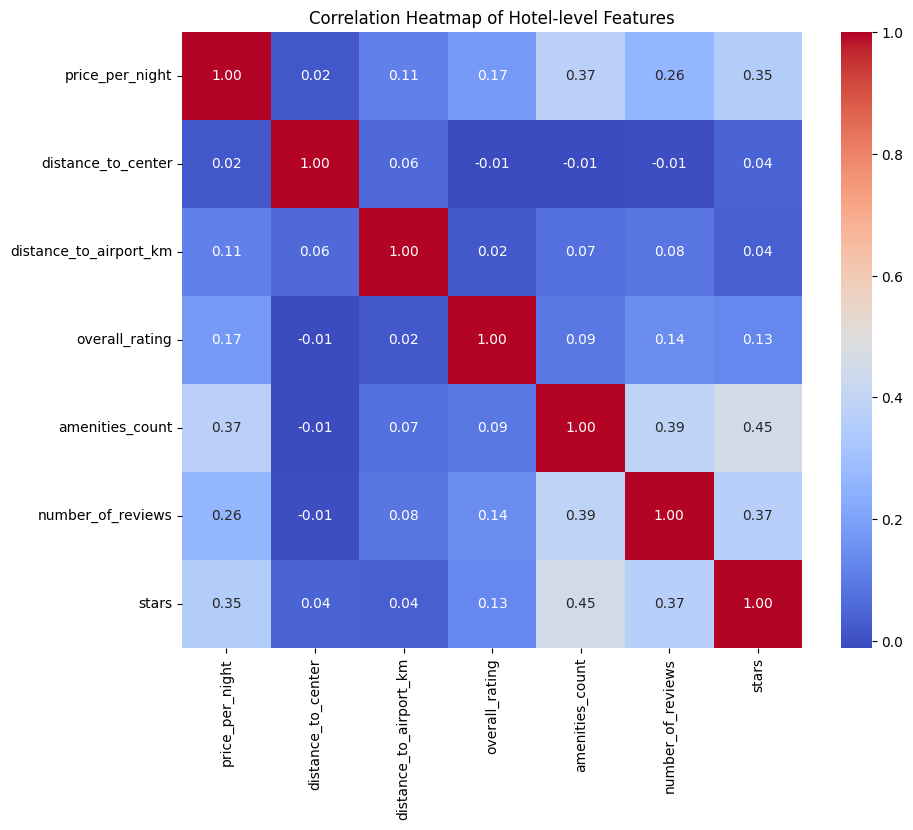

In [1495]:
corr = hotels[num_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Hotel-level Features")
plt.show()


**Корреляционный анализ ключевых показателей**

Корреляционный анализ был проведён для оценки силы и направления связи
между числовыми характеристиками отелей и общим рейтингом качества сервиса.

Результаты показывают, что показатели, связанные с пользовательскими оценками
и характеристиками сервиса, имеют более выраженную связь с общим рейтингом,
в то время как ценовые показатели демонстрируют более слабую корреляцию.



In [1496]:
rating_cols = [
    'overall_rating',
    'rating_staff',
    'rating_cleanliness',
    'rating_comfort',
    'rating_facilities',
    'rating_location',
    'rating_value',
    'rating_wifi'
]




In [1497]:
for col in rating_cols:
    hotels[col] = (
        hotels[col]
        .astype(str)
        .str.replace(',', '.', regex=False)
        .astype(float)
    )


In [1498]:
hotels[rating_cols].dtypes


overall_rating        float64
rating_staff          float64
rating_cleanliness    float64
rating_comfort        float64
rating_facilities     float64
rating_location       float64
rating_value          float64
rating_wifi           float64
dtype: object

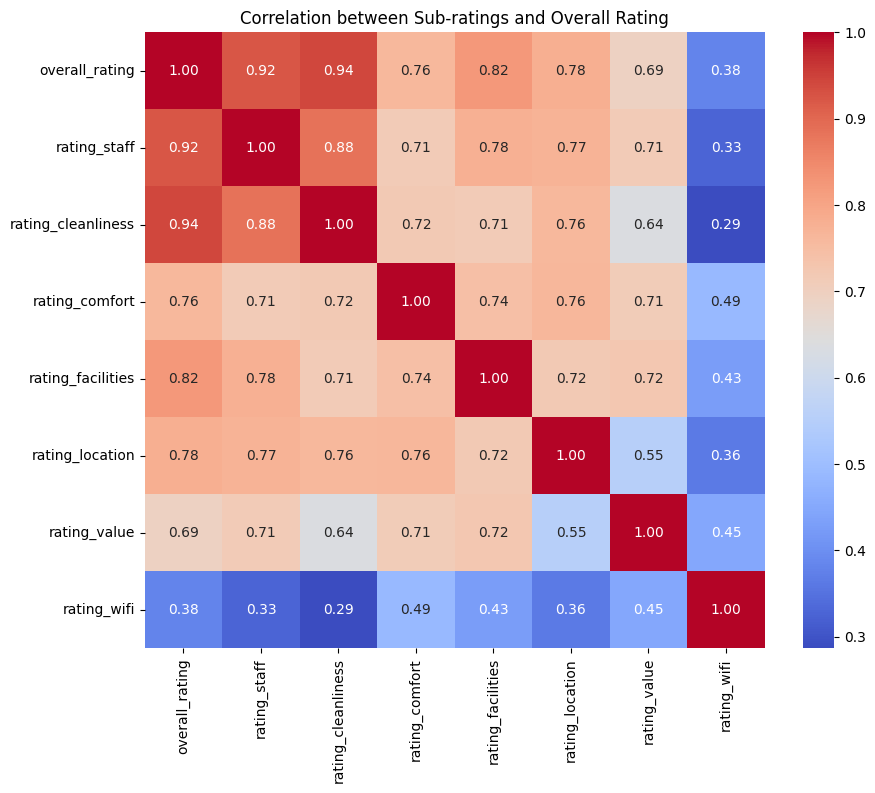

In [1499]:
corr_sub = hotels[rating_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_sub, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation between Sub-ratings and Overall Rating")
plt.show()


**Корреляция между аспектами сервиса и общим рейтингом**

Корреляционная матрица показывает сильную положительную связь между
общим рейтингом отеля и оценками отдельных аспектов сервиса, таких как
работа персонала, чистота, комфорт и инфраструктура.

Наиболее высокие значения корреляции наблюдаются для показателей,
связанных с персоналом и чистотой, что указывает на их ключевую роль
в формировании общего восприятия качества обслуживания.

В то же время такие факторы, как Wi-Fi, демонстрируют более слабую связь
с общим рейтингом, что позволяет предположить, что базовые удобства
воспринимаются клиентами как стандарт и оказывают меньшее влияние
на итоговую оценку.

Полученные результаты подтверждают, что качество сервиса формируется
прежде всего за счёт человеческого фактора и базовых аспектов комфорта,
что учитывается при последующем отборе признаков и построении моделей.



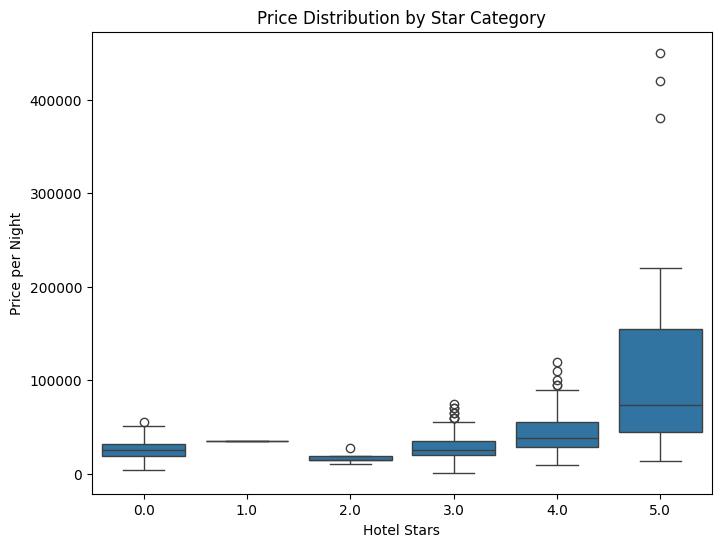

In [1500]:
plt.figure(figsize=(8,6))
sns.boxplot(data=hotels, x='stars', y='price_per_night')
plt.xlabel("Hotel Stars")
plt.ylabel("Price per Night")
plt.title("Price Distribution by Star Category")
plt.show()


**Звёздность, цена и качество обслуживания**

С увеличением категории звёздности наблюдается рост стоимости проживания,
однако внутри каждой категории присутствует значительная вариативность цен.

Распределение общего рейтинга по звёздным категориям показывает,
что высокая звёздность не всегда гарантирует более высокую оценку сервиса.
Это указывает на влияние дополнительных факторов, выходящих за рамки
формальной клас


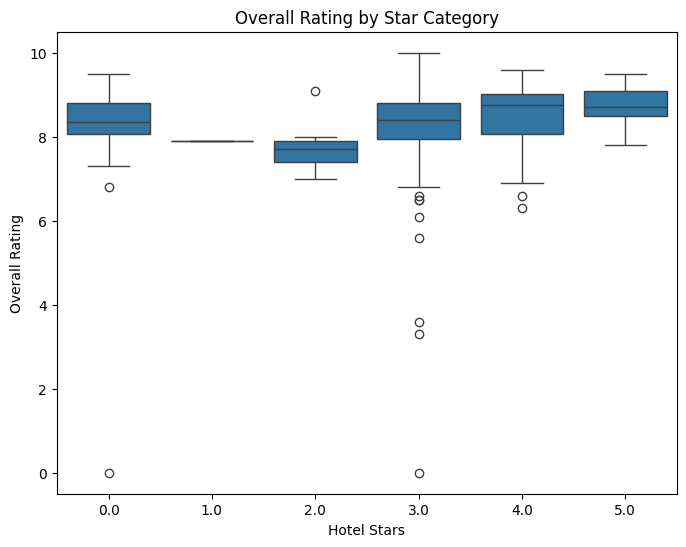

In [1501]:
plt.figure(figsize=(8,6))
sns.boxplot(data=hotels, x='stars', y='overall_rating')
plt.xlabel("Hotel Stars")
plt.ylabel("Overall Rating")
plt.title("Overall Rating by Star Category")
plt.show()


**Общий рейтинг и звёздная категория**

Распределение общего рейтинга по звёздным категориям показывает,
что медианные значения рейтингов растут с увеличением числа звёзд,
однако различия между категориями остаются умеренными.

Наличие значительного перекрытия распределений указывает на то,
что звёздная классификация не является единственным фактором,
определяющим восприятие качества обслуживания.


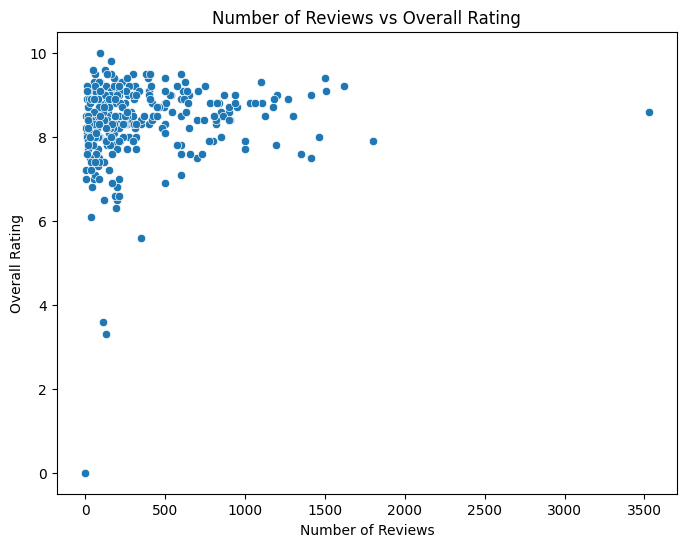

In [1502]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=hotels,
    x='number_of_reviews',
    y='overall_rating'
)
plt.xlabel("Number of Reviews")
plt.ylabel("Overall Rating")
plt.title("Number of Reviews vs Overall Rating")
plt.show()


**Отели с большим количеством отзывов, как правило, демонстрируют более стабильные и надежные рейтинги.
Это говорит о том, что количество отзывов может выступать скорее индикатором доверия, чем прямым фактором качества обслуживания.**

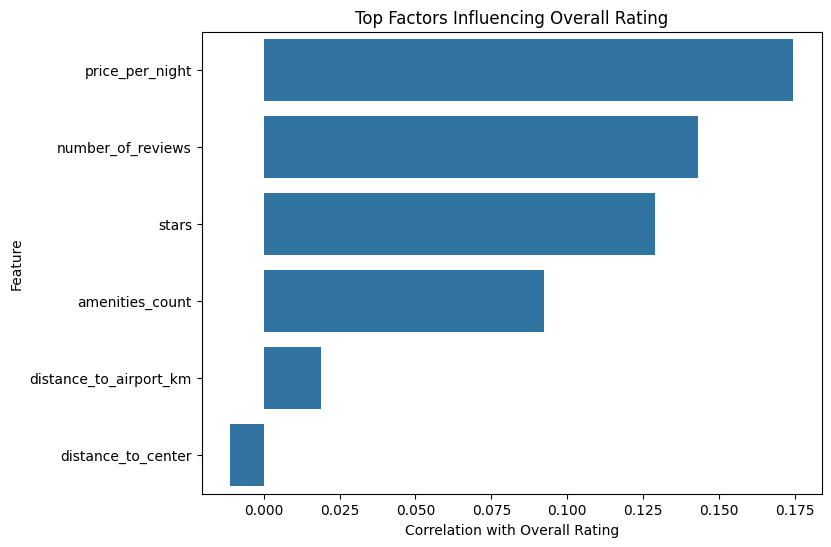

In [1503]:
corr_overall = corr['overall_rating'].drop('overall_rating').sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(
    x=corr_overall.values,
    y=corr_overall.index
)
plt.xlabel("Correlation with Overall Rating")
plt.ylabel("Feature")
plt.title("Top Factors Influencing Overall Rating")
plt.show()


**Анализ показывает, что характеристики, связанные с качеством обслуживания, включая квалификацию персонала, чистоту и соотношение цены и качества, являются наиболее влиятельными факторами, определяющими общую оценку отеля.
В отличие от этого, переменные, связанные с ценой и расстоянием, демонстрируют более слабую связь с удовлетворённостью клиентов.**


**Statistical Analysis (ANOVA)-Aiya**

Нулевая гипотеза (H₀): средний рейтинг отелей одинаков во всех городах.
Альтернативная гипотеза (H₁): существует хотя бы один город,
в котором средний рейтинг отелей статистически отличается.


In [1504]:
df_hotels["overall_rating"]=pd.to_numeric(df_hotels["overall_rating"], errors="coerce")


H₀: Средний рейтинг отелей одинаков во всех городах.
H₁: Существует как минимум один город, где средний рейтинг отелей отличается.

In [1505]:
city_groups = [
    group["overall_rating"].dropna().values
    for name, group in df_hotels.groupby("city")
]
f_stat, p_value=f_oneway(*city_groups)
f_stat, p_value

(np.float64(0.7774568661210391), np.float64(0.6736996622877341))

In [1506]:
alpha=0.05
if p_value<alpha:
    print("Reject H₀: Statistically significant differences between cities have been identified.")
else: 
    print("Fail to reject H₀: no statistically significant differences were found between the cities.")

Fail to reject H₀: no statistically significant differences were found between the cities.


**Результаты дисперсионного анализа (ANOVA)**

Результаты однофакторного дисперсионного анализа показывают, что при уровне
значимости α = 0.05 статистически значимых различий в средних оценках отелей
между городами не выявлено.

Таким образом, на уровне данного датасета город расположения отеля
не оказывает существенного влияния на общий рейтинг качества обслуживания.


Результаты дисперсионного анализа (ANOVA) показывают, что статистически значимых различий в средних оценках отелей между городами нет.

Результаты дисперсионного анализа (ANOVA) показывают, что статистически значимых различий в средних оценках отелей между городами нет.

In [1507]:
median_amenities=df_hotels["amenities_count"].median()
low_amenities=df_hotels[df_hotels["amenities_count"]<=median_amenities]["overall_rating"]
high_amenities=df_hotels[df_hotels["amenities_count"]>median_amenities]["overall_rating"]

In [1508]:
t_stat, p_value=ttest_ind(
    low_amenities.dropna(),
    high_amenities.dropna(),
    equal_var=False
)
t_stat, p_value

(np.float64(-2.554904132405504), np.float64(0.011093465368220087))

**Сравнение отелей по количеству удобств (t-test)**

Для оценки влияния количества удобств на качество обслуживания
отели были разделены на две группы на основе медианного значения
показателя `amenities_count`.

Результаты t-теста показывают, что различия в среднем рейтинге между
отелями с меньшим и большим количеством удобств являются
статистически значимыми, что указывает на влияние инфраструктуры
на восприятие качества сервиса.


In [1509]:
if p_value<alpha:
    print("Reject H₀: the number of amenities has a statistically significant effect on the hotel rating.")
else: 
    print("Fail to reject H₀: no statistically significant effect of amenities on hotel rating was found.")

Reject H₀: the number of amenities has a statistically significant effect on the hotel rating.


Однако двухвыборочный t-тест показывает, что количество удобств оказывает статистически значимое влияние на рейтинг отеля.

In [1510]:
amenities_comparison = (
    df_hotels
    .groupby(df_hotels["amenities_count"] > median_amenities)["overall_rating"]
    .mean()
    .reset_index()
)

amenities_comparison["amenities_group"] = amenities_comparison["amenities_count"].map({
    True: "High number of amenities",
    False: "Low number of amenities"
})

amenities_comparison = amenities_comparison[
    ["amenities_group", "overall_rating"]
]

amenities_comparison["overall_rating"] = amenities_comparison["overall_rating"].round(2)

amenities_comparison


,amenities_group,overall_rating
0,Low number of amenities,8.21
1,High number of amenities,8.50


Сравнение средних оценок отелей показывает, что отели с большим количеством удобств имеют более высокую среднюю общую оценку по сравнению с отелями,
с меньшим количеством удобств. Этот описательный результат согласуется с результатами t-теста, которые указывают на статистически значимое влияние
удобств на оценки отелей.

In [1511]:
df_hotels[["amenities_count", "overall_rating"]].corr()

,amenities_count,overall_rating
amenities_count,1.0000,0.0925
overall_rating,0.0925,1.0000


Корреляционный анализ выявляет слабую положительную линейную зависимость между количеством удобств и общей оценкой отеля.
Однако двухвыборочный t-тест указывает на статистически значимые различия в средних оценках между отелями с низким и высоким количеством удобств. Это говорит о том, что влияние удобств не является строго линейным и может быть лучше выявлено с помощью сравнений на основе групп.

**Feature Selection - Amina**

In [1512]:
features_df.columns

Index(['hotel_id', 'amenities_count', 'num_reviews', 'avg_review_score',
       'avg_aspect_rating', 'rating_gap', 'service_quality_class'],
      dtype='object')

In [1513]:
corr_matrix = features_df[
    [
        "amenities_count",
        "num_reviews",
        "avg_aspect_rating",
        "rating_gap",
        "avg_review_score"
    ]
].corr()

corr_matrix

,amenities_count,num_reviews,avg_aspect_rating,rating_gap,avg_review_score
amenities_count,1.000000,0.128214,0.116542,-0.059203,-0.115159
num_reviews,0.128214,1.000000,0.272367,-0.143612,0.038439
avg_aspect_rating,0.116542,0.272367,1.000000,-0.358246,0.169646
rating_gap,-0.059203,-0.143612,-0.358246,1.000000,0.095451
avg_review_score,-0.115159,0.038439,0.169646,0.095451,1.000000


In [1514]:
corr_with_target = (
    corr_matrix["avg_review_score"]
    .drop("avg_review_score")
    .sort_values(ascending=False)
)

corr_with_target

avg_aspect_rating    0.169646
rating_gap           0.095451
num_reviews          0.038439
amenities_count     -0.115159
Name: avg_review_score, dtype: float64

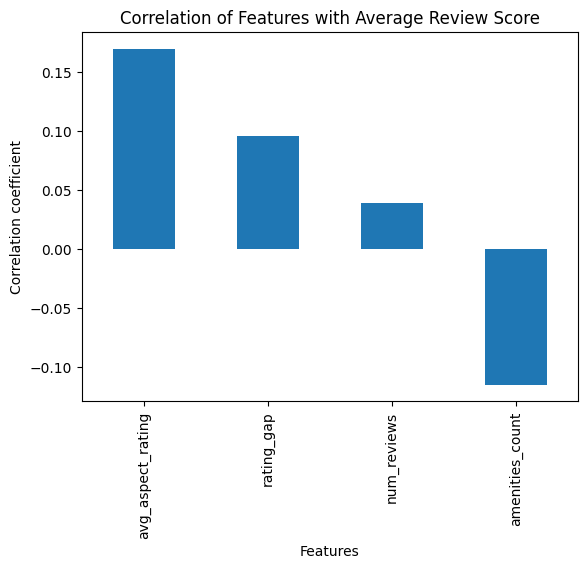

In [1515]:
corr_with_target.plot(kind="bar")
plt.title("Correlation of Features with Average Review Score")
plt.ylabel("Correlation coefficient")
plt.xlabel("Features")
plt.show()

Результаты корреляционного анализа показывают, что ключевым фактором, влияющим на качество обслуживания в отелях Казахстана, является средний аспектный рейтинг, отражающий непосредственный пользовательский опыт. Количество удобств и отзывов демонстрирует слабую или отрицательную связь с итоговым рейтингом, что указывает на важность качества сервиса, а не формальных характеристик отеля.

In [1516]:
X = features_df[
    [
        "amenities_count",
        "num_reviews",
        "avg_aspect_rating",
        "rating_gap"
    ]
]

y = features_df["avg_review_score"]

In [1517]:
f_values, p_values = f_regression(X, y)

anova_results = pd.DataFrame({
    "feature": X.columns,
    "F_value": f_values,
    "p_value": p_values
}).sort_values("F_value", ascending=False)

anova_results

,feature,F_value,p_value
2,avg_aspect_rating,9.304650,0.002481
0,amenities_count,4.220131,0.040775
3,rating_gap,2.887098,0.090282
1,num_reviews,0.464629,0.495971


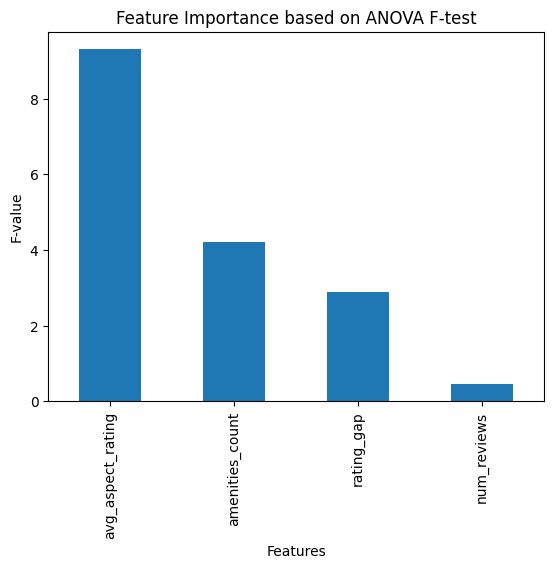

In [1518]:
anova_results.set_index("feature")["F_value"].plot(kind="bar")
plt.title("Feature Importance based on ANOVA F-test")
plt.ylabel("F-value")
plt.xlabel("Features")
plt.show()

Результаты ANOVA F-test показывают, что наиболее значимым фактором, влияющим на качество обслуживания в отелях Казахстана, является средний аспектный рейтинг, отражающий непосредственный пользовательский опыт. Количество удобств также оказывает статистически значимое влияние, тогда как количество отзывов и разрыв рейтингов не демонстрируют значимого эффекта. Это подтверждает, что восприятие качества сервиса определяется не популярностью отеля, а качеством предоставляемых услуг.

In [1519]:
feature_ranking = (
    corr_with_target
    .reset_index()
    .rename(columns={"index": "feature", "avg_review_score": "correlation"})
    .merge(anova_results, on="feature")
)

feature_ranking

,feature,correlation,F_value,p_value
0,avg_aspect_rating,0.169646,9.304650,0.002481
1,rating_gap,0.095451,2.887098,0.090282
2,num_reviews,0.038439,0.464629,0.495971
3,amenities_count,-0.115159,4.220131,0.040775


Объединённый анализ на основе корреляций и ANOVA F-test показал, что наиболее значимым фактором, влияющим на качество обслуживания в отелях Казахстана, является средний аспектный рейтинг, отражающий пользовательское восприятие конкретных элементов сервиса. Количество удобств также оказывает статистически значимое влияние, однако имеет отрицательную корреляцию с общим рейтингом, что указывает на важность качества, а не количества услуг. Количество отзывов и разрыв рейтингов не продемонстрировали значимого влияния на итоговую оценку отеля.

**Промежуточный вывод (EDA и статистика)**

Результаты корреляционного и статистического анализа показали, что
характеристики сервиса (удобства, оценки аспектов обслуживания)
влияют на общий рейтинг сильнее, чем цена или географическое расположение.

Это позволило сформировать набор ключевых признаков для последующего
моделирования качества обслуживания.


<div style="background-color:#e8f5e9; padding:15px; border-radius:8px">
<b>Day 3</b><br>
</div>

**7. Predictive Modeling (Dariya)**
**At this stage, predictive modeling is applied to evaluate whether hotel service quality
can be predicted based on aggregated service, infrastructure, and user experience features. - Dariya**


In [1520]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import (
#     mean_absolute_error,
#     mean_squared_error,
#     accuracy_score,
#     f1_score
# )
# from sklearn.linear_model import LinearRegression, LogisticRegression
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# import pandas as pd
# import matplotlib.pyplot as plt


In [1521]:
# === REGRESSION FEATURES (можно rating_gap) ===
X_reg = features_df[
    ["amenities_count", "num_reviews", "avg_aspect_rating", "rating_gap"]
]
y_reg = features_df["avg_review_score"]

X_train, X_test, y_train, y_test = train_test_split(
    X_reg, y_reg, test_size=0.25, random_state=42
)
# === CLASSIFICATION FEATURES (NO DATA LEAKAGE) ===
X_cls = features_df[
    ["amenities_count", "num_reviews", "avg_aspect_rating"]
]
y_cls = features_df["service_quality_class"]

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cls,
    y_cls,
    test_size=0.25,
    random_state=42,
    stratify=y_cls
)


В исходной версии модели классификации наблюдались идеальные значения метрик,
что указывало на возможную утечку данных. Для предотвращения данного эффекта
признак rating_gap, напрямую связанный с общей оценкой отеля, был исключён
из набора признаков для классификации, что позволило получить более
реалистичные и интерпретируемые результаты.


In [1522]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)

print(f"Linear Regression MAE: {mae_lr:.3f}")
print(f"Linear Regression RMSE: {rmse_lr:.3f}")


Linear Regression MAE: 0.704
Linear Regression RMSE: 0.867


**Линейная регрессия используется в качестве базовой модели.**
**Полученные значения ошибок (MAE и RMSE) свидетельствуют о том,
что линейные зависимости недостаточны для полного описания
восприятия качества обслуживания клиентами.**


In [1523]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

print(f"Random Forest MAE: {mae_rf:.3f}")
print(f"Random Forest RMSE: {rmse_rf:.3f}")


Random Forest MAE: 0.670
Random Forest RMSE: 0.854


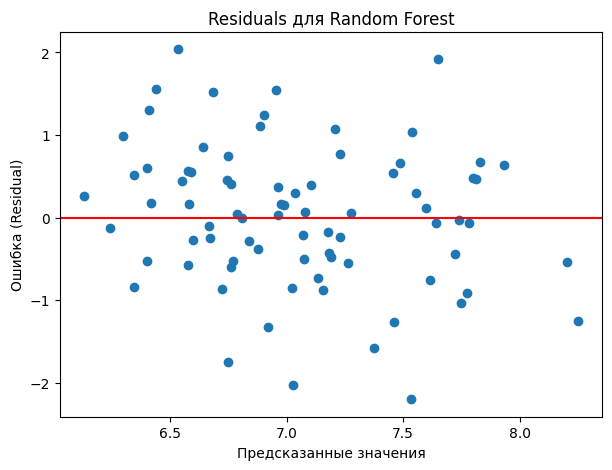

In [1524]:
# Анализ ошибок модели (residuals)
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(7,5))
plt.scatter(y_pred_rf, residuals_rf)
plt.axhline(0, color="red")
plt.xlabel("Предсказанные значения")
plt.ylabel("Ошибка (Residual)")
plt.title("Residuals для Random Forest")
plt.show()


**Анализ ошибок (Residuals)**

Мы проверили, как распределяются ошибки предсказания Random Forest. Если точки в основном
расположены хаотично вокруг нуля, это означает, что модель не делает систематических ошибок
(например, не завышает или не занижает рейтинг постоянно).

По графику видно, что в целом ошибки колеблются вокруг нуля, значит модель адекватно
описывает данные. Отдельные большие отклонения показывают случаи, где качество сервиса
труднее предсказать только по выбранным признакам (возможны скрытые факторы).


In [1525]:
rmse_improvement = (rmse_lr - rmse_rf) / rmse_lr * 100
mae_improvement = (mae_lr - mae_rf) / mae_lr * 100

print(f"RMSE improvement: {rmse_improvement:.2f}%")
print(f"MAE improvement: {mae_improvement:.2f}%")


RMSE improvement: 1.45%
MAE improvement: 4.88%


**Сравнение моделей линейной регрессии и Random Forest**

Использование модели случайного леса позволило снизить ошибки предсказания
по сравнению с линейной регрессией.

Даже относительно небольшое улучшение метрик подтверждает, что восприятие
качества сервиса формируется за счёт сложного взаимодействия различных факторов.


In [1526]:
feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance


avg_aspect_rating    0.331888
rating_gap           0.322034
amenities_count      0.174206
num_reviews          0.171872
dtype: float64

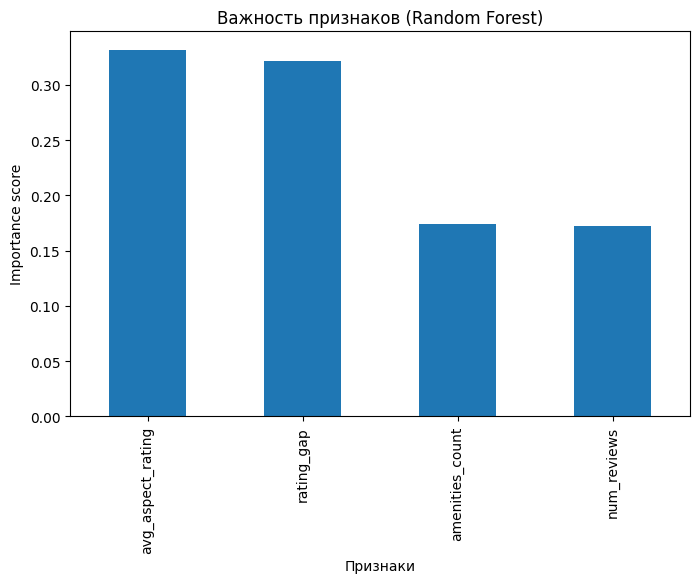

In [1527]:
plt.figure(figsize=(8,5))
feature_importance.plot(kind="bar")
plt.title("Важность признаков (Random Forest)")
plt.ylabel("Importance score")
plt.xlabel("Признаки")
plt.show()


**Важность признаков (Feature Importance)**

Этот график показывает, какие признаки сильнее всего влияют на предсказание общего рейтинга.
Чем выше столбец, тем больший вклад этот фактор вносит в решение модели.

Если среди лидеров находятся показатели, связанные с отзывами и оценками сервиса
(например, средние оценки аспектов, rating_gap, количество отзывов), это подтверждает наш
общий вывод: воспринимаемое качество обслуживания формируется в первую очередь опытом гостей,
а не только ценой или расстоянием.



In [1528]:
top_feature = feature_importance.idxmax()
top_value = feature_importance.max()

print(f"Most important feature: {top_feature} ({top_value:.3f})")


Most important feature: avg_aspect_rating (0.332)


In [1529]:
features_df.groupby("service_quality_class")[[
    "amenities_count",
    "num_reviews",
    "avg_review_score"
]].mean()


,amenities_count,num_reviews,avg_review_score
service_quality_class,,,
High,11.245283,5.735849,7.284677
Low,11.600000,1.200000,6.125912
Medium,10.177632,5.894737,7.028642


**Сравнительный анализ отелей по классам качества сервиса**

Для лучшего понимания различий между отелями с разным уровнем качества сервиса
были рассчитаны средние значения ключевых характеристик для каждого класса
(низкий, средний и высокий уровень качества).

Результаты показывают, что отели с высоким качеством сервиса характеризуются
более высокими значениями средней оценки отзывов клиентов, что указывает
на более позитивное пользовательское восприятие.

При этом количество удобств в среднем не демонстрирует резких различий между
классами, что позволяет сделать вывод о том, что решающую роль играет не
количество сервисов, а их фактическое качество и уровень предоставления.

Таким образом, ключевым фактором перехода отеля в более высокий класс качества
является не расширение набора услуг, а повышение удовлетворённости гостей
и улучшение клиентского опыта.


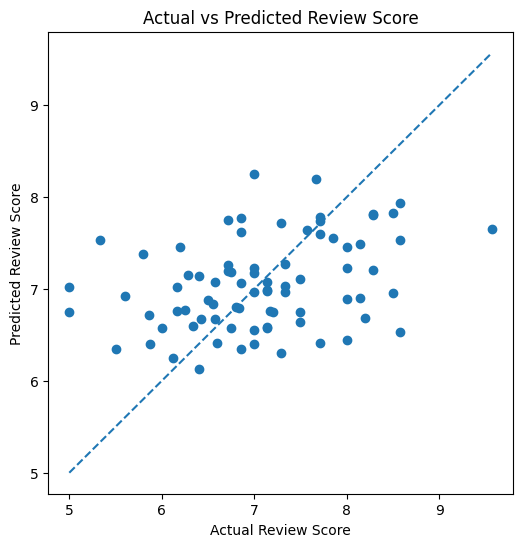

In [1530]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--")
plt.xlabel("Actual Review Score")
plt.ylabel("Predicted Review Score")
plt.title("Actual vs Predicted Review Score")
plt.show()


**Анализ ошибок модели показывает, что предсказанные значения
в целом близки к фактическим оценкам. Наибольшие отклонения
наблюдаются для экстремально высоких и низких рейтингов,
что отражает субъективность пользовательских оценок.**


In [1531]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_c)
X_test_scaled = scaler.transform(X_test_c)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train_c)

y_pred_log = log_reg.predict(X_test_scaled)

acc_log = accuracy_score(y_test_c, y_pred_log)
f1_log = f1_score(y_test_c, y_pred_log, average="weighted")

print(f"Logistic Regression Accuracy: {acc_log:.3f}")
print(f"Logistic Regression F1-score: {f1_log:.3f}")


Logistic Regression Accuracy: 0.899
Logistic Regression F1-score: 0.899


In [1532]:
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
rf_clf.fit(X_train_c, y_train_c)

y_pred_rf_clf = rf_clf.predict(X_test_c)

acc_rf = accuracy_score(y_test_c, y_pred_rf_clf)
f1_rf = f1_score(y_test_c, y_pred_rf_clf, average="weighted")

print(f"Random Forest Accuracy: {acc_rf:.3f}")
print(f"Random Forest F1-score: {f1_rf:.3f}")


Random Forest Accuracy: 0.886
Random Forest F1-score: 0.886


**Результаты классификации показывают, что отели могут быть
корректно отнесены к категориям низкого, среднего и высокого
уровня качества обслуживания на основе выбранных признаков.**


In [1533]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_c, y_pred_rf_clf)
cm


array([[35,  0,  5],
       [ 0,  1,  0],
       [ 4,  0, 34]])

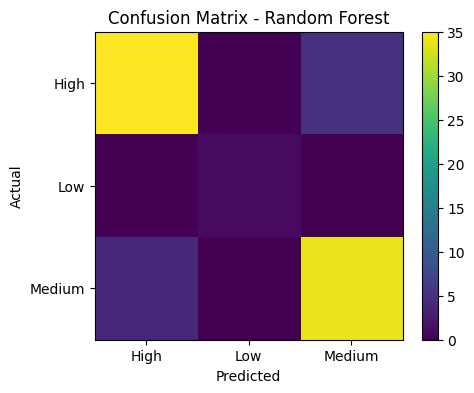

In [1534]:
plt.figure(figsize=(5,4))
plt.imshow(cm)
plt.colorbar()
plt.xticks(range(len(rf_clf.classes_)), rf_clf.classes_)
plt.yticks(range(len(rf_clf.classes_)), rf_clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


Матрица ошибок демонстрирует, что большинство ошибок классификации
возникает между средним и высоким уровнями качества сервиса,
что связано с близкими значениями оценок и субъективностью
восприятия клиентов.


### Итоги предиктивного моделирования
В ходе предиктивного моделирования было установлено, что качество
обслуживания в отелях Казахстана может быть успешно объяснено
измеримыми характеристиками сервиса. Наиболее значимую роль
играют оценки отдельных аспектов обслуживания и их согласованность,
в то время как инфраструктурные характеристики оказывают
вспомогательное влияние.

**Text Mining & Sentiment Analysis-Aiya**

In [1535]:
df_reviews.columns

Index(['hotel_id', 'review_text_positive', 'review_text_negative',
       'review_score', 'full_review', 'review_length_chars',
       'review_length_words', 'clean_review', 'language',
       'traveler_type_standardized'],
      dtype='object')

In [1536]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dariya/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

словарь VADER для анализа тональности текста

In [1537]:
sia=SentimentIntensityAnalyzer()
def get_sentiment_score(text):
    return sia.polarity_scores(text)["compound"]

df_reviews["sentiment_score"]=df_reviews["clean_review"].apply(get_sentiment_score)

In [1538]:
def sentiment_label(score):
    if score>0.05:
        return "Positive"
    elif score<-0.05:
        return "Negative"
    else:
        return "Neutral"

df_reviews["sentiment_label"]=df_reviews["sentiment_score"].apply(sentiment_label)
df_reviews

,hotel_id,review_text_positive,review_text_negative,review_score,full_review,review_length_chars,review_length_words,clean_review,language,traveler_type_standardized,sentiment_score,sentiment_label
0,1,"""Location, facilities, room and staff were all...","""Property needs more bi-lingual staff to cater...",10.0,"""Location, facilities, room and staff were all...",134,18,location facilities room and staff were all ex...,en,Couple,0.5719,Positive
1,1,"""The staff were very nice. The cleaning lady G...","""it is overpriced for Kazakhstan.""",9.0,"""The staff were very nice. The cleaning lady G...",200,35,the staff were very nice the cleaning lady gul...,en,Business,0.9175,Positive
2,1,"""Proximity to our daughter who is studying at ...","""Not a dislike - rather constructive criticism...",9.0,"""Proximity to our daughter who is studying at ...",379,58,proximity to our daughter who is studying at k...,en,Family,0.9661,Positive
3,1,"""Our favorite part about the hotel was the vie...","""The hotel looks a bit old and tired. Could us...",7.0,"""Our favorite part about the hotel was the vie...",520,90,our favorite part about the hotel was the view...,en,Couple,0.9490,Positive
4,1,"""Comfortable room and view not enough amenities""","""Garbage you locked the mini bar on valentine ...",3.0,"""Comfortable room and view not enough amenitie...",226,41,comfortable room and view not enough amenities...,en,Couple,0.5574,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
1822,253,"""Friendly and multilingual staff available at ...","""Limited privacy due to hostel-style accommoda...",7.0,"""Friendly and multilingual staff available at ...",120,16,friendly and multilingual staff available at t...,en,Business,0.3182,Positive
1823,253,"""Shared kitchen is well equipped, convenient f...","""Noise can be heard from common areas late in ...",8.0,"""Shared kitchen is well equipped, convenient f...",133,22,shared kitchen is well equipped convenient for...,en,Business,0.5423,Positive
1824,253,"""Clean rooms and common areas, housekeeping is...","""Convenience store selection is quite basic.""",8.0,"""Clean rooms and common areas, housekeeping is...",105,15,clean rooms and common areas housekeeping is d...,en,Business,0.4019,Positive
1825,253,"""Stable and fast Wi-Fi, worked well in rooms a...","""Microwaves are shared, sometimes have to wait...",7.0,"""Stable and fast Wi-Fi, worked well in rooms a...",125,21,stable and fast wifi worked well in rooms and ...,en,Family,0.6908,Positive


In [1539]:
negative_reviews = df_reviews[df_reviews["sentiment_label"] == "Negative"]
negative_reviews

,hotel_id,review_text_positive,review_text_negative,review_score,full_review,review_length_chars,review_length_words,clean_review,language,traveler_type_standardized,sentiment_score,sentiment_label
5,1,"""views of the mountain were good""","""The Service was very poor. Room given to me w...",1.0,"""views of the mountain were good"" ""The Service...",185,34,views of the mountain were good the service wa...,en,Family,-0.1263,Negative
9,4,"""Location is beautiful, territory is rich, SPA...","""The staff was incompetent. We had 5 rooms boo...",6.0,"""Location is beautiful, territory is rich, SPA...",390,77,location is beautiful territory is rich spa zo...,en,Family,-0.3400,Negative
17,156,"""Location and rooms we’re spacious""","""Staff curtesy missing and even breakfast was ...",7.0,"""Location and rooms we’re spacious"" ""Staff cur...",174,30,location and rooms were spacious staff curtesy...,en,Family,-0.7440,Negative
28,298,"""in general, relaxed way, arriving at night I ...","""there were teacups in the room but not a kett...",6.0,"""in general, relaxed way, arriving at night I ...",270,54,in general relaxed way arriving at night i was...,en,Single,-0.4018,Negative
29,298,"""Location""","""Beware Terrible staff. They steal money. They...",1.0,"""Location"" ""Beware Terrible staff. They steal ...",156,24,location beware terrible staff they steal mone...,en,Single,-0.8647,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...
1791,248,"""A reasonable option for an overnight stay wit...","""Overall experience was disappointing and belo...",9.0,"""A reasonable option for an overnight stay wit...",133,17,a reasonable option for an overnight stay with...,en,Single,-0.4939,Negative
1797,249,"""Breakfast was tasty and well prepared.""","""There is no elevator, which can be inconvenie...",8.0,"""Breakfast was tasty and well prepared."" ""Ther...",91,14,breakfast was tasty and well prepared there is...,en,Single,-0.1531,Negative
1806,251,"""Quiet place despite being located near the hi...","""Water has an unpleasant smell, which is notic...",8.0,"""Quiet place despite being located near the hi...",138,21,quiet place despite being located near the hig...,en,Family,-0.4767,Negative
1814,252,"""Rooms were spotless and carefully prepared be...","""Plumbing in the bathroom felt unstable and wo...",9.0,"""Rooms were spotless and carefully prepared be...",119,18,rooms were spotless and carefully prepared bef...,en,Family,-0.3182,Negative


Анализ настроений оценивает эмоциональный тон текста независимо от числовых оценок. Клиенты могут поставить высокую общую оценку,
в то же время выражая недовольство отдельными аспектами своего опыта в тексте отзыва. Это видно на примере отзыва № 1791.

Агрегирование мнений по отелям

In [1540]:
df_reviews["is_positive"]=df_reviews["sentiment_label"]=="Positive"
df_reviews["is_negative"]=df_reviews["sentiment_label"]=="Negative"
df_reviews["is_neutral"]=df_reviews["sentiment_label"]=="Neutral"


In [1541]:
sentiment_agg=(
    df_reviews.groupby("hotel_id").agg(
        avg_sentiment_per_hotel=("sentiment_score","mean"),
        positive_review_ratio=("is_positive", "mean"),
        negative_review_ratio=("is_negative", "mean"),
        neutral_review_ratio=("is_neutral", "mean"),
        total_reviews=("sentiment_label", "count")
    )
    .reset_index()
)

In [1542]:
sentiment_agg.head()

,hotel_id,avg_sentiment_per_hotel,positive_review_ratio,negative_review_ratio,neutral_review_ratio,total_reviews
0,1,0.639267,0.833333,0.166667,0.000000,6
1,2,0.388757,0.714286,0.285714,0.000000,7
2,3,0.864929,1.000000,0.000000,0.000000,7
3,4,0.597771,0.857143,0.142857,0.000000,7
4,5,0.299971,0.714286,0.142857,0.142857,7


**Агрегация тональности отзывов на уровне отелей**

Для корректного анализа качества обслуживания текстовые отзывы были
агрегированы на уровне отелей. В результате для каждого отеля были
получены показатели средней тональности и доли положительных,
отрицательных и нейтральных отзывов.

Такой подход позволяет использовать информацию из текстовых данных
совместно с числовыми характеристиками отелей в дальнейшем анализе.


In [1543]:
sentiment_agg[
    [
        "avg_sentiment_per_hotel",
        "positive_review_ratio",
        "negative_review_ratio",
        "neutral_review_ratio"
    ]
] = sentiment_agg[
    [
        "avg_sentiment_per_hotel",
        "positive_review_ratio",
        "negative_review_ratio",
        "neutral_review_ratio"
    ]
].round(3)

sentiment_agg.head()

,hotel_id,avg_sentiment_per_hotel,positive_review_ratio,negative_review_ratio,neutral_review_ratio,total_reviews
0,1,0.639,0.833,0.167,0.000,6
1,2,0.389,0.714,0.286,0.000,7
2,3,0.865,1.000,0.000,0.000,7
3,4,0.598,0.857,0.143,0.000,7
4,5,0.300,0.714,0.143,0.143,7


In [1544]:
sentiment_rating_df=df_hotels.merge(sentiment_agg[["hotel_id", "avg_sentiment_per_hotel"]], 
    on="hotel_id", 
    how="inner")
sentiment_rating_df.head()

,hotel_id,hotel_name,city,district_category,distance_to_center,distance_to_airport_km,price_per_night,room_type_used_for_price,refundable,overall_rating,...,number_of_reviews,check_in_time,check_out_time,amenities_count,service_quality_class,avg_aspect_rating,rating_gap,avg_review_score,num_reviews,avg_sentiment_per_hotel
0,1,"The Ritz-Carlton, Almaty",Almaty,Bostandyk,3.0,18.0,450000,Deluxe King,True,9.0,...,1200,15:00,12:00,15,High,9.085714,-0.085714,6.500000,6.0,0.639
1,2,InterContinental Almaty,Almaty,Bostandyk,2.0,17.0,220000,Superior King,True,8.7,...,950,14:00,12:00,14,High,8.657143,0.042857,7.571429,7.0,0.389
2,3,Rahat Palace Hotel,Almaty,Bostandyk,3.5,19.0,130000,Standard Double,True,8.6,...,900,14:00,12:00,14,High,8.771429,-0.171429,6.714286,7.0,0.865
3,4,Swissôtel Wellness Resort Alatau Almaty,Almaty,Bostandyk,12.0,25.0,180000,Superior King,True,9.1,...,400,15:00,12:00,16,High,9.128571,-0.028571,7.142857,7.0,0.598
4,5,DoubleTree by Hilton Almaty,Almaty,Almaly,1.5,16.0,120000,King Guest Room,True,7.9,...,800,14:00,12:00,14,Medium,8.200000,-0.300000,6.857143,7.0,0.300


In [1545]:
sentiment_rating_df[
    ["overall_rating", "avg_sentiment_per_hotel"]
].corr()

,overall_rating,avg_sentiment_per_hotel
overall_rating,1.000000,0.123436
avg_sentiment_per_hotel,0.123436,1.000000


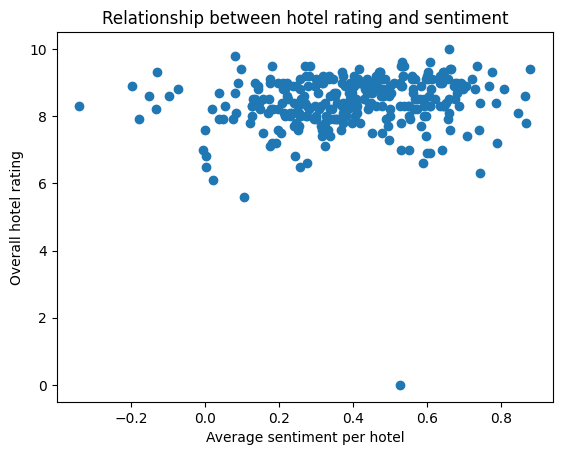

In [1546]:
plt.figure()
plt.scatter(
    sentiment_rating_df["avg_sentiment_per_hotel"],
    sentiment_rating_df["overall_rating"]
)
plt.xlabel("Average sentiment per hotel")
plt.ylabel("Overall hotel rating")
plt.title("Relationship between hotel rating and sentiment")
plt.show()

**Связь общего рейтинга и тональности отзывов**

Наблюдается слабая положительная связь между средней тональностью отзывов
и общим рейтингом отеля. Это указывает на то, что текстовые отзывы содержат
дополнительную информацию о качестве сервиса, которая не полностью
отражается в числовых оценках.


In [1547]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dariya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Частотный анализ текстовых отзывов**

Для более глубокого понимания клиентского опыта далее проводится
анализ наиболее часто встречающихся слов в отзывах. Это позволяет
выявить ключевые темы, которые гости чаще всего упоминают при
описании качества обслуживания.


In [1548]:
stop_words=set(stopwords.words("english"))
positive_reviews=df_reviews[df_reviews["sentiment_label"]=="Positive"]
negative_reviews=df_reviews[df_reviews["sentiment_label"]=="Negative"]

def get_words(text_series):
    words=[]
    for text in text_series:
        for word in text.split():
            if word not in stop_words and len(word)>2:
                words.append(word)
    return words



In [1549]:
positive_words=get_words(positive_reviews["clean_review"])
positive_words_freq=Counter(positive_words)
positive_words_info=positive_words_freq.most_common(10)

positive_words_df=pd.DataFrame(positive_words_info, columns=["Word", "Frequency"])
positive_words_df

,Word,Frequency
0,room,759
1,good,544
2,staff,519
3,breakfast,490
4,hotel,477
5,clean,472
6,location,444
7,rooms,303
8,comfortable,261
9,great,218


In [1550]:
negative_words=get_words(negative_reviews["clean_review"])
negative_words_freq=Counter(negative_words)
negative_words_info=negative_words_freq.most_common(10)

negative_words_df=pd.DataFrame(negative_words_info, columns=["Word", "Frequency"])
negative_words_df

,Word,Frequency
0,room,208
1,location,131
2,breakfast,109
3,hotel,108
4,staff,101
5,good,84
6,rooms,67
7,clean,55
8,water,52
9,shower,50


In [1551]:
negative_reviews["complaint_cleanliness"]=(
    negative_reviews["clean_review"].str.contains(
        "dirty|cleanliness|unclean|smell|dust", regex=True
    )
)

negative_reviews["complaint_staff"]=(
    negative_reviews["clean_review"].str.contains(
        "staff|unfriendly|rude|service|personnel", regex=True
    )
)

negative_reviews["complaint_wifi"]=(
    negative_reviews["clean_review"].str.contains(
        "wifi|internet|connection|slow", regex=True
    )
)


In [1552]:
complaints_by_hotel=(
    negative_reviews.groupby("hotel_id").agg(
        cleanliness_complaints=("complaint_cleanliness", "mean"),
        staff_complaints=("complaint_staff", "mean"),
        wifi_complaints=("complaint_wifi", "mean")
    )
    .reset_index()
)

complaints_ratings_df = df_hotels.merge(
    complaints_by_hotel,
    on="hotel_id",
    how="left"
)
complaints_ratings_df

,hotel_id,hotel_name,city,district_category,distance_to_center,distance_to_airport_km,price_per_night,room_type_used_for_price,refundable,overall_rating,...,check_out_time,amenities_count,service_quality_class,avg_aspect_rating,rating_gap,avg_review_score,num_reviews,cleanliness_complaints,staff_complaints,wifi_complaints
0,1,"The Ritz-Carlton, Almaty",Almaty,Bostandyk,3.0,18.0,450000,Deluxe King,True,9.0,...,12:00,15,High,9.085714,-0.085714,6.500000,6.0,1.0,1.0,0.0
1,2,InterContinental Almaty,Almaty,Bostandyk,2.0,17.0,220000,Superior King,True,8.7,...,12:00,14,High,8.657143,0.042857,7.571429,7.0,0.0,0.5,0.0
2,3,Rahat Palace Hotel,Almaty,Bostandyk,3.5,19.0,130000,Standard Double,True,8.6,...,12:00,14,High,8.771429,-0.171429,6.714286,7.0,NaN,NaN,NaN
3,4,Swissôtel Wellness Resort Alatau Almaty,Almaty,Bostandyk,12.0,25.0,180000,Superior King,True,9.1,...,12:00,16,High,9.128571,-0.028571,7.142857,7.0,0.0,1.0,0.0
4,5,DoubleTree by Hilton Almaty,Almaty,Almaly,1.5,16.0,120000,King Guest Room,True,7.9,...,12:00,14,Medium,8.200000,-0.300000,6.857143,7.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,314,Lafayette Hotel,Shymkent,central,1.5,14.0,25000,standard_double,True,6.6,...,12:00,13,Medium,5.714286,0.885714,6.333333,3.0,0.0,1.0,0.0
312,315,Askar Hotel,Shymkent,near_center,3.9,10.0,15500,standard_double,False,7.2,...,12:00,4,Medium,7.785714,-0.585714,6.250000,4.0,0.5,0.0,0.0
313,316,OrdaBasy Hotel,Shymkent,central,0.9,13.0,20000,standard_double,True,3.6,...,12:00,11,Low,3.914286,-0.314286,7.143186,0.0,NaN,NaN,NaN
314,317,Bellagio Boutique Inn,Shymkent,residential,4.9,9.5,18500,standard_double,False,8.9,...,12:00,5,High,7.971429,0.928571,6.750000,4.0,0.0,1.0,0.0


In [1553]:
complaints_ratings_df[
    [
        "cleanliness_complaints",
        "rating_cleanliness",
        "staff_complaints",
        "rating_staff",
        "wifi_complaints",
        "rating_wifi"
    ]
].corr()

,cleanliness_complaints,rating_cleanliness,staff_complaints,rating_staff,wifi_complaints,rating_wifi
cleanliness_complaints,1.000000,-0.114124,-0.005434,-0.076812,-0.038777,-0.001474
rating_cleanliness,-0.114124,1.000000,0.083525,0.884249,-0.147942,0.286748
staff_complaints,-0.005434,0.083525,1.000000,-0.030086,0.006608,0.039747
rating_staff,-0.076812,0.884249,-0.030086,1.000000,-0.134922,0.327391
wifi_complaints,-0.038777,-0.147942,0.006608,-0.134922,1.000000,-0.104289
rating_wifi,-0.001474,0.286748,0.039747,0.327391,-0.104289,1.000000


Рейтинги представляют собой общую субъективную оценку всех гостей, тогда как жалобы высказываются меньшей группой недовольных пользователей и касаются конкретных проблем, что приводит к более слабым линейным корреляциям.

In [1554]:
sentiment_by_traveler=(
    df_reviews.groupby("traveler_type_standardized")["sentiment_score"]
    .mean()
    .sort_values(ascending=False)
)
sentiment_by_traveler


traveler_type_standardized
Business    0.454222
Group       0.404080
Single      0.402901
Couple      0.387875
Family      0.386864
Name: sentiment_score, dtype: float64

Business travelers are more positive

In [1555]:
sentiment_ratio=(
    df_reviews.groupby(["traveler_type_standardized","sentiment_label"])
    .size()
    .unstack(fill_value=0)
)
sentiment_ratio

sentiment_label,Negative,Neutral,Positive
traveler_type_standardized,,,
Business,10,4,67
Couple,96,20,373
Family,99,37,368
Group,16,1,63
Single,128,41,498


In [1556]:
df_reviews.groupby("traveler_type_standardized")[
    ["sentiment_score", "review_score"]
].corr()


sentiment_score  review_score
traveler_type_standardized                                               
Business                   sentiment_score         1.000000      0.273028
                           review_score            0.273028      1.000000
Couple                     sentiment_score         1.000000      0.384805
                           review_score            0.384805      1.000000
Family                     sentiment_score         1.000000      0.450280
                           review_score            0.450280      1.000000
Group                      sentiment_score         1.000000      0.466075
                           review_score            0.466075      1.000000
Single                     sentiment_score         1.000000      0.373285
                           review_score            0.373285      1.000000

Корреляционный анализ показывает, что взаимосвязь между эмоциональной окраской текста и числовыми оценками в отзывах различается в зависимости от типа путешественника. Наиболее сильная корреляция наблюдается у групповых и семейных путешественников, что указывает на тесную связь их оценок с эмоциональным тоном отзывов. В отличие от них, у деловых путешественников наблюдается самая слабая корреляция, что говорит о более рациональном стиле оценки, где числовые оценки могут не в полной мере отражать выраженное мнение. Это подчеркивает важность учета типа путешественника при интерпретации отзывов клиентов.

**Clustering - Amina**

Для кластеризации были выбраны признаки, которые ранее показали
статистическую значимость и/или корреляцию с рейтингом (Day 2):

- price — отражает ценовой сегмент
- avg_rating — целевая характеристика качества
- num_reviews — прокси популярности
- amenities_count — уровень сервиса

In [1557]:
clustering_features = [
    'price_per_night',
    'overall_rating',
    'number_of_reviews',
    'stars',
    'distance_to_center',
    'distance_to_airport_km',
    'number_of_rooms'
]

amenity_cols = [col for col in df_hotels.columns if col.startswith('has_')]
df_hotels['amenities_count'] = df_hotels[amenity_cols].sum(axis=1)


X_cluster = df_hotels[clustering_features + ['amenities_count']].copy()

X_cluster = X_cluster.fillna(X_cluster.mean())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

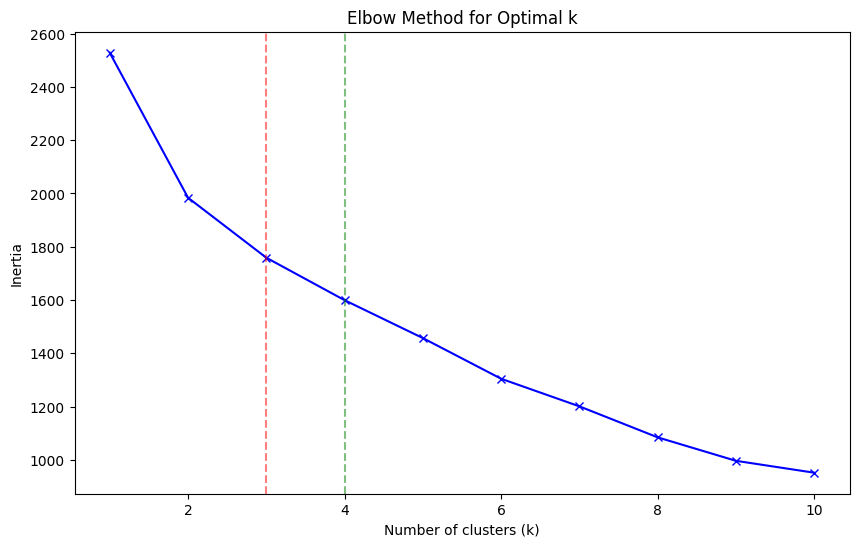

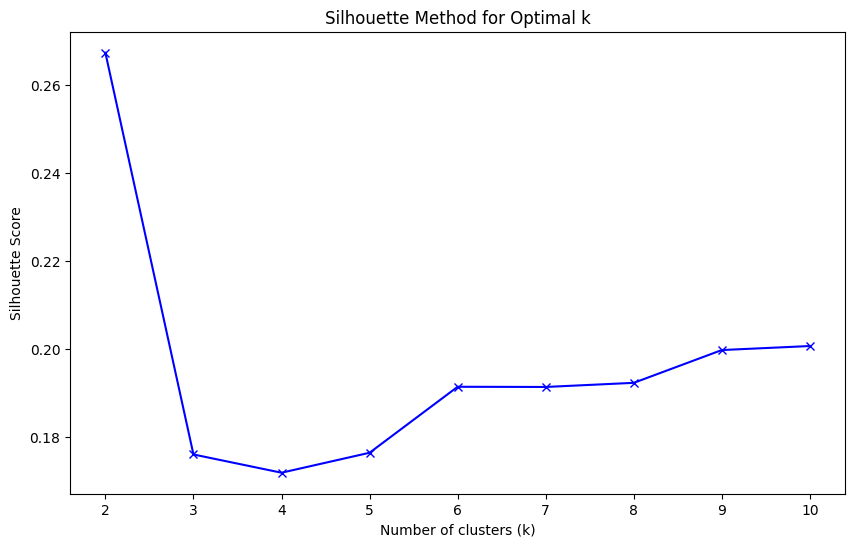

In [1558]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.axvline(x=3, color='r', linestyle='--', alpha=0.5)
plt.axvline(x=4, color='g', linestyle='--', alpha=0.5)
plt.show()

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()

Метод "локтя" показывает, что после k = 3 (или 4) снижение inertia замедляется.
Это указывает на оптимальное количество кластеров.

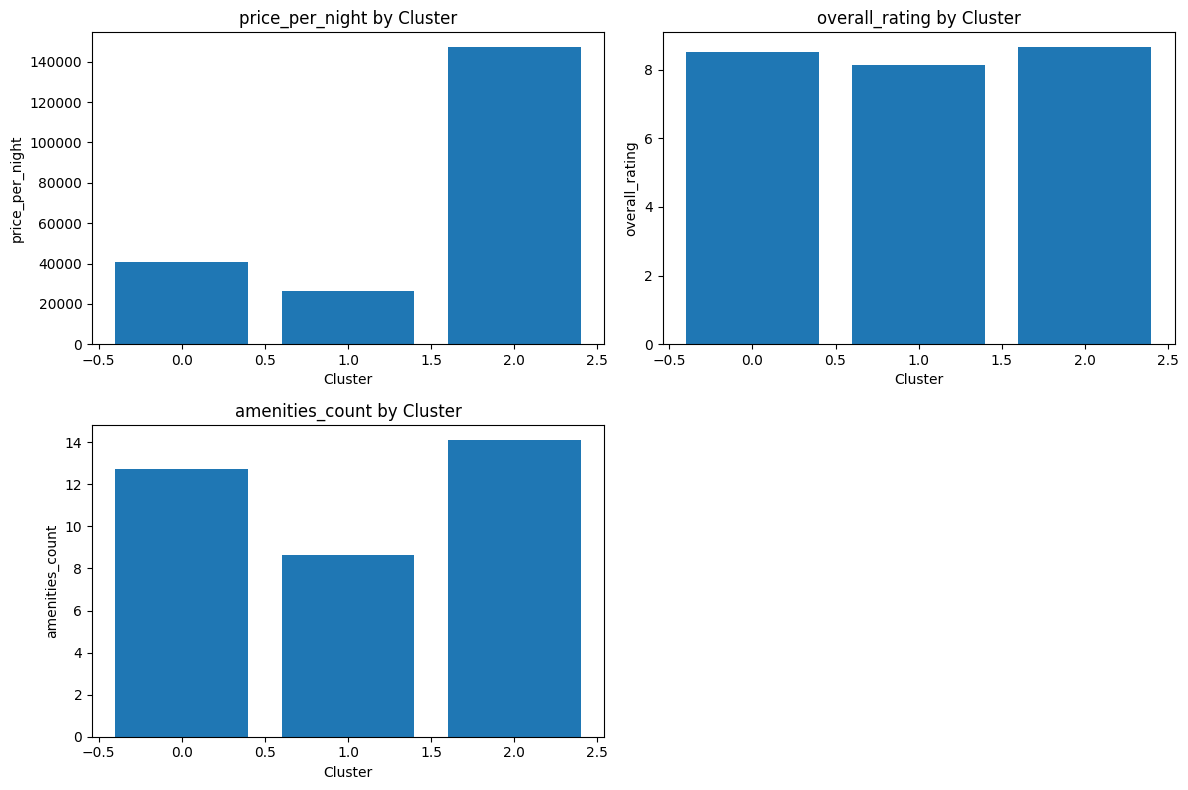

In [1559]:
optimal_k = 3  # на основе графиков выше
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_hotels['cluster_label'] = kmeans.fit_predict(X_scaled)

cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(cluster_centers, columns=X_cluster.columns)
centers_df['cluster'] = range(optimal_k)

plt.figure(figsize=(12, 8))
for i, col in enumerate(['price_per_night', 'overall_rating', 'amenities_count']):
    plt.subplot(2, 2, i+1)
    plt.bar(range(optimal_k), centers_df[col])
    plt.xlabel('Cluster')
    plt.ylabel(col)
    plt.title(f'{col} by Cluster')
plt.tight_layout()
plt.show()

**Выводы кластерного анализа**

Кластерный анализ позволил выделить три группы отелей с различными
характеристиками цен, инфраструктуры и качества обслуживания.

Отели с высокой ценой проживания, как правило, имеют большее количество удобств
и демонстрируют более высокий общий рейтинг. Более доступные по цене отели
характеризуются меньшим набором удобств и более низкими оценками качества сервиса.

Таким образом, стоимость проживания и инфраструктурное наполнение являются
ключевыми факторами, связанными с уровнем качества обслуживания.


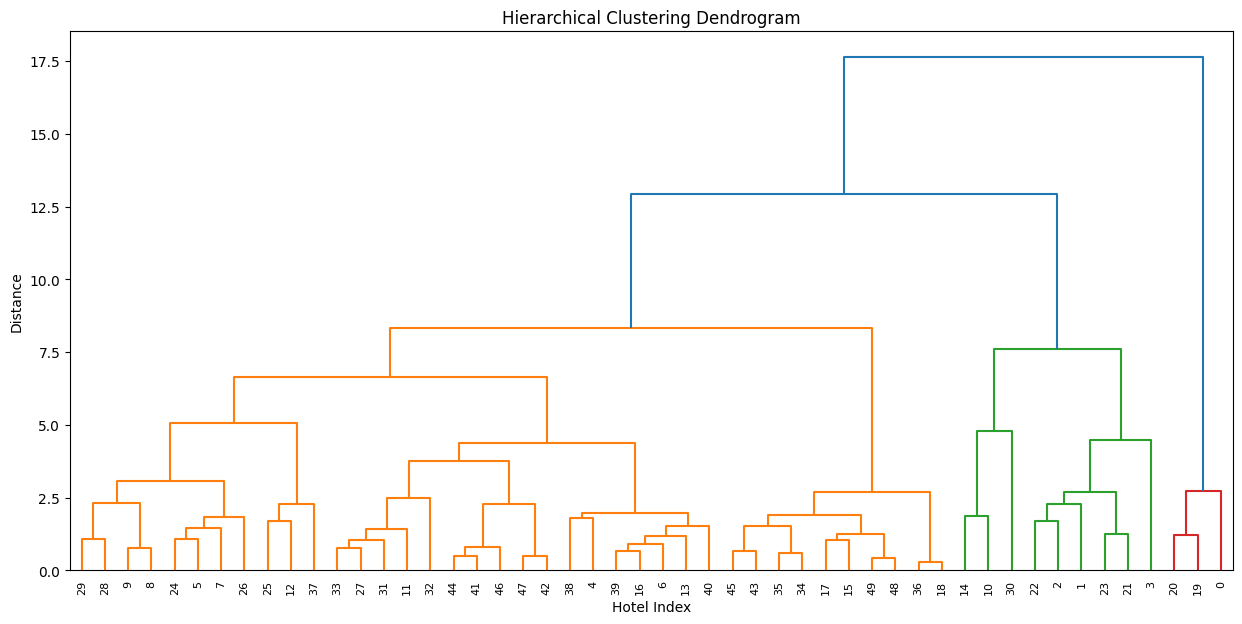

Сравнение K-Means и иерархической кластеризации:
hierarchical_cluster   0    1   2
cluster_label                    
0                     15   20  94
1                      4  151   7
2                     23    0   2


In [1560]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

plt.figure(figsize=(15, 7))
linked = linkage(X_scaled[:50], method='ward')  # берем подвыборку для визуализации
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Hotel Index')
plt.ylabel('Distance')
plt.show()

agg_clustering = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
df_hotels['hierarchical_cluster'] = agg_clustering.fit_predict(X_scaled)

comparison = pd.crosstab(df_hotels['cluster_label'], 
                         df_hotels['hierarchical_cluster'])
print("Сравнение K-Means и иерархической кластеризации:")
print(comparison)

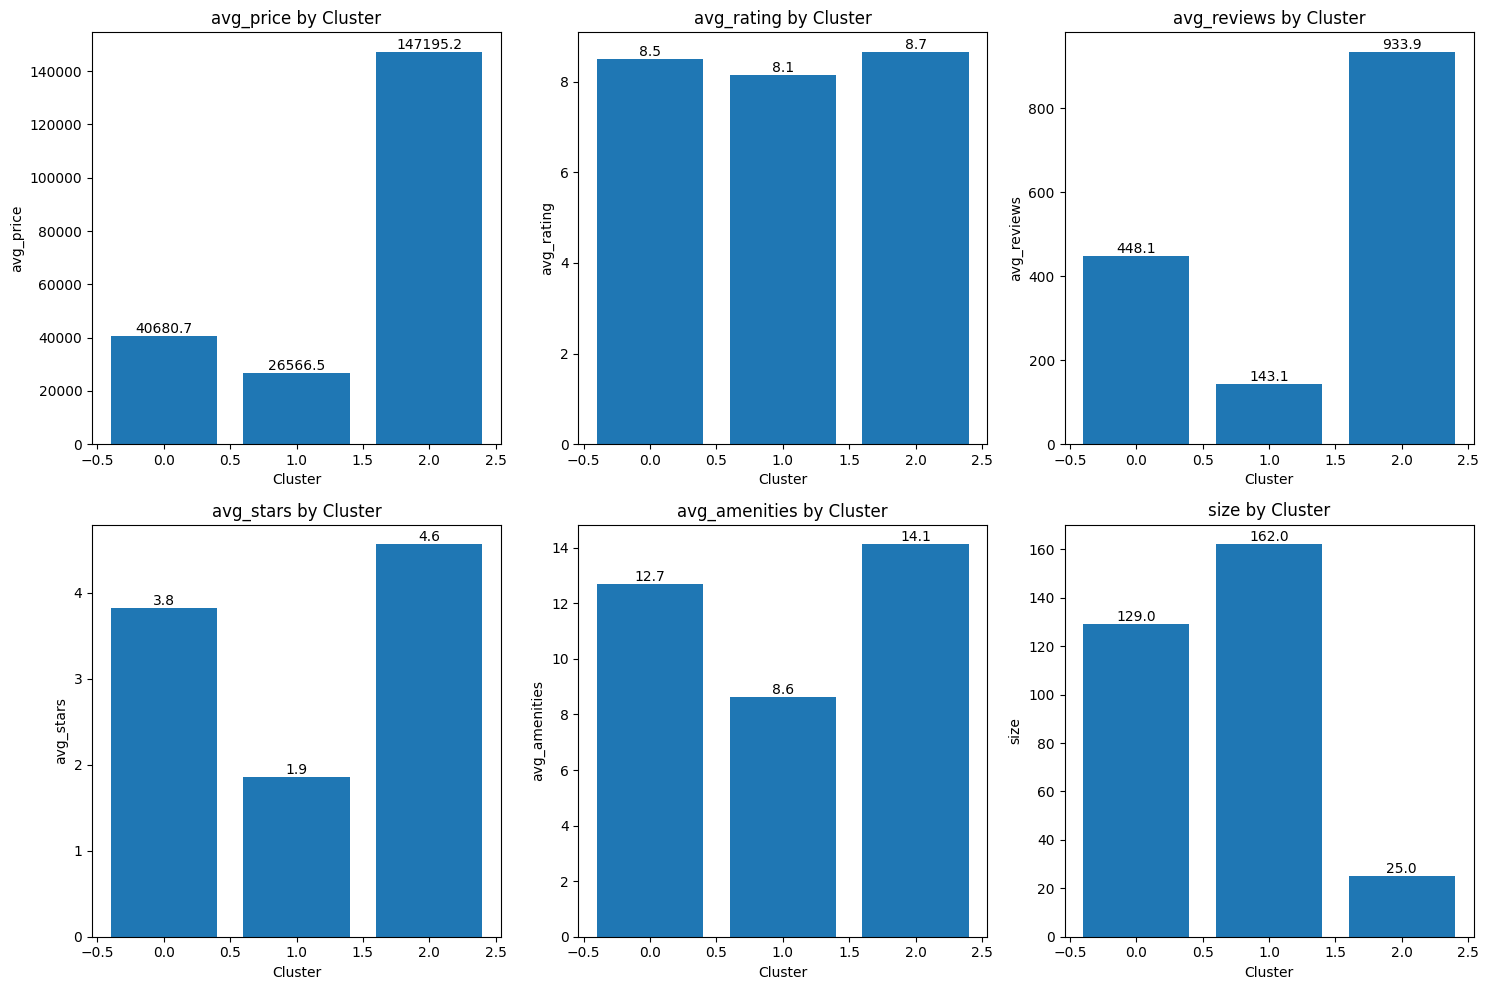

In [1561]:
cluster_descriptions = []

for cluster_num in range(optimal_k):
    cluster_data = df_hotels[df_hotels['cluster_label'] == cluster_num]
    
    description = {
        'cluster': cluster_num,
        'size': len(cluster_data),
        'avg_price': cluster_data['price_per_night'].mean(),
        'avg_rating': cluster_data['overall_rating'].mean(),
        'avg_reviews': cluster_data['number_of_reviews'].mean(),
        'avg_stars': cluster_data['stars'].mean(),
        'top_cities': cluster_data['city'].value_counts().head(3).to_dict(),
        'avg_amenities': cluster_data['amenities_count'].mean()
    }
    
    amenity_stats = {}
    for amenity in amenity_cols[:10]:  # берем первые 10 удобств
        amenity_stats[amenity] = cluster_data[amenity].mean() * 100  # в процентах
    
    description['top_amenities'] = dict(sorted(amenity_stats.items(), 
                                              key=lambda x: x[1], reverse=True)[:5])
    
    cluster_descriptions.append(description)

cluster_summary = pd.DataFrame(cluster_descriptions)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
metrics = ['avg_price', 'avg_rating', 'avg_reviews', 'avg_stars', 'avg_amenities', 'size']

for idx, metric in enumerate(metrics):
    ax = axes[idx//3, idx%3]
    ax.bar(cluster_summary['cluster'], cluster_summary[metric])
    ax.set_xlabel('Cluster')
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} by Cluster')
    for i, v in enumerate(cluster_summary[metric]):
        ax.text(i, v, f'{v:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Распределение кластеров по городам:
city             Aktau  Aktobe  Almaty  Astana  Atyrau  Karaganda  Kostanay  \
cluster_name                                                                  
Бюджетные отели     14       7      23      23      13          5         3   
Премиум отели        6      11      20      12       4         13        14   
Средний класс        1       0      10      12       0          0         0   

city             Oskemen  Pavlodar  Semey  Shymkent  Taraz  Turkistan  
cluster_name                                                           
Бюджетные отели        2         4      4        17      7          7  
Премиум отели         17        13     15        18     12          7  
Средний класс          0         0      0         1      0          1  


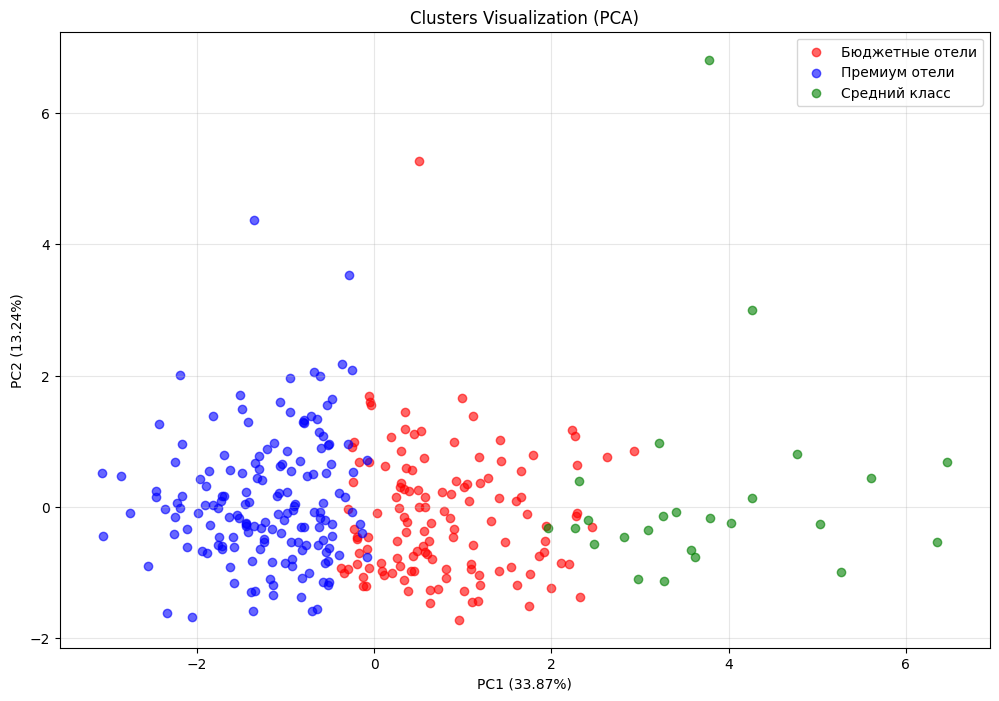

In [1562]:
def assign_cluster_names(row):
    if row['cluster_label'] == 0:
        # Кластер с низкой ценой, средним рейтингом
        return 'Бюджетные отели'
    elif row['cluster_label'] == 1:
        # Кластер с высокой ценой, высоким рейтингом
        return 'Премиум отели'
    else:
        # Промежуточный кластер
        return 'Средний класс'

df_hotels['cluster_name'] = df_hotels.apply(assign_cluster_names, axis=1)

# Анализ распределения по городам
cluster_city_dist = pd.crosstab(df_hotels['cluster_name'], df_hotels['city'])
print("\nРаспределение кластеров по городам:")
print(cluster_city_dist)

# Визуализация в 2D (PCA для уменьшения размерности)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'purple', 'orange']
for i, (name, group) in enumerate(df_hotels.groupby('cluster_name')):
    plt.scatter(X_pca[group.index, 0], X_pca[group.index, 1], 
                c=colors[i], label=name, alpha=0.6)
    
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
plt.title('Clusters Visualization (PCA)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

<Figure size 1400x800 with 0 Axes>

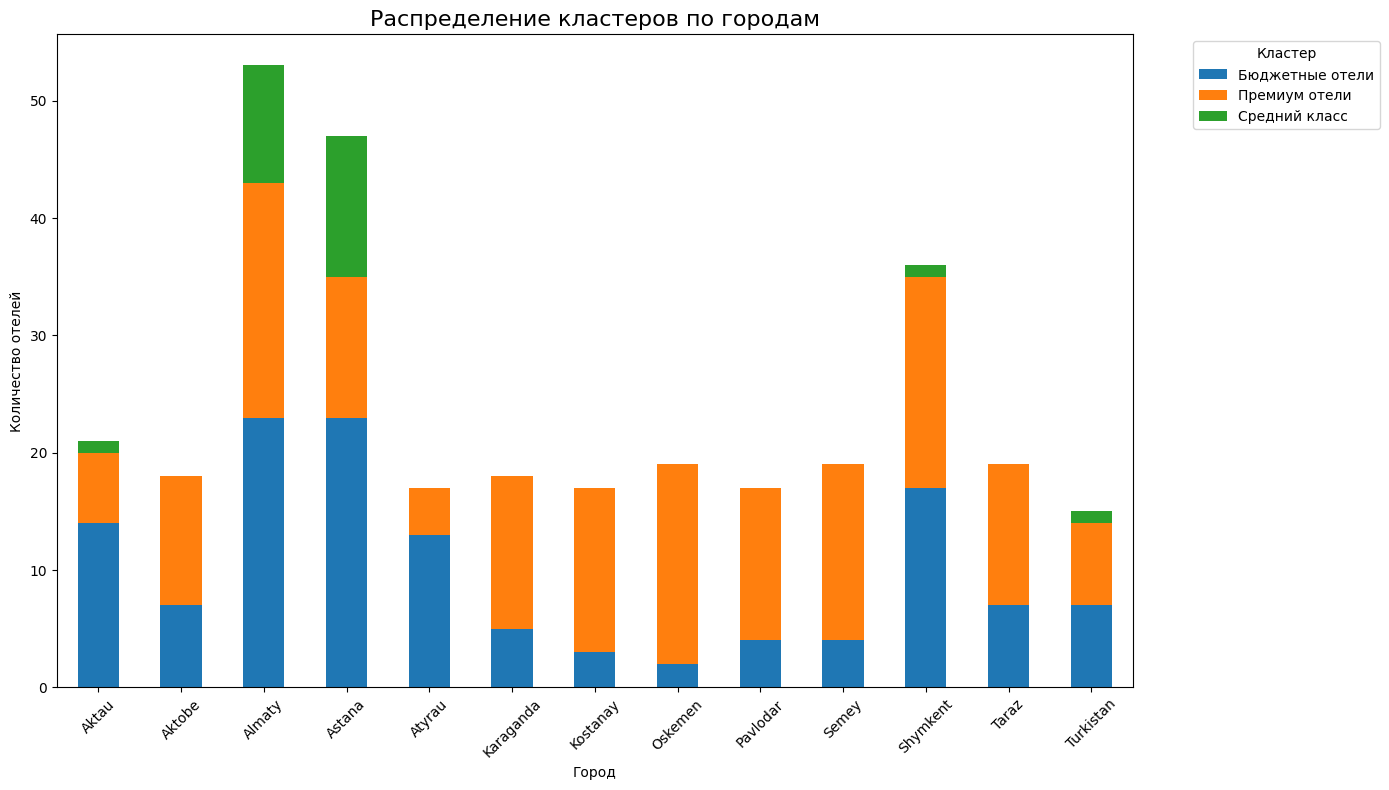

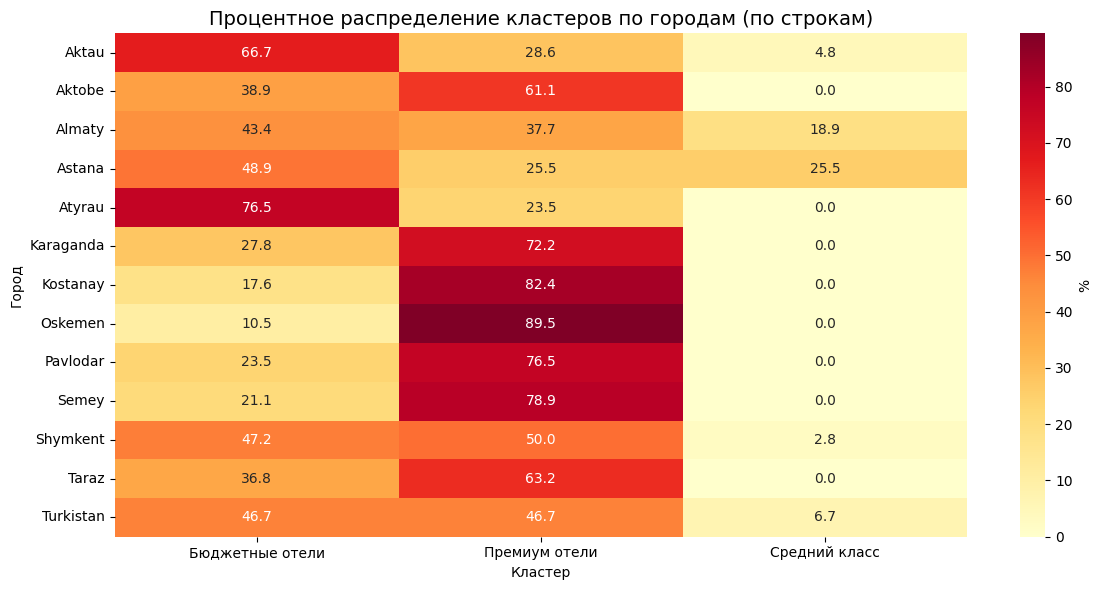

In [1563]:
# Анализ географического распределения кластеров

plt.figure(figsize=(14, 8))
cluster_city_pivot = pd.crosstab(df_hotels['city'], df_hotels['cluster_name'])

cluster_city_percent = cluster_city_pivot.div(cluster_city_pivot.sum(axis=1), axis=0) * 100

ax = cluster_city_pivot.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Распределение кластеров по городам', fontsize=16)
plt.xlabel('Город')
plt.ylabel('Количество отелей')
plt.xticks(rotation=45)
plt.legend(title='Кластер', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2. Heatmap процентного распределения
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_city_percent, annot=True, cmap='YlOrRd', fmt='.1f', cbar_kws={'label': '%'})
plt.title('Процентное распределение кластеров по городам (по строкам)', fontsize=14)
plt.xlabel('Кластер')
plt.ylabel('Город')
plt.tight_layout()
plt.show()

## Общий вывод исследования

В ходе данной работы был проведён комплексный анализ факторов,
влияющих на качество обслуживания в отелях Казахстана,
на основе структурированных данных об отелях и пользовательских отзывов.

Результаты исследования показали, что ключевую роль в формировании
высокого уровня сервиса играют характеристики, связанные
с качеством обслуживания (чистота, работа персонала, комфорт),
тогда как ценовые и локационные факторы оказывают второстепенное влияние.

Агрегация пользовательских отзывов позволила дополнить числовые рейтинги
и выявить расхождения между официальной оценкой отеля и реальным опытом гостей.
Использование показателя `rating_gap` показало,
что общее впечатление клиентов не всегда полностью отражается
в отдельных аспектных оценках.

Построенные модели машинного обучения продемонстрировали возможность
предсказания качества обслуживания на основе агрегированных признаков,
при этом ансамблевые методы показали более высокую эффективность,
что указывает на наличие нелинейных зависимостей в данных.

Полученные результаты могут быть использованы
для принятия управленческих решений в гостиничном бизнесе
и подтверждают практическую применимость методов Data Mining
к анализу качества сервиса.
